
# 23S1-AI6124 Stock Trading Project Assignment
Created by A/Prof Kai Keng ANG (kkang@i2r.a-star.edu.sg, kkang@ntu.edu.sg). Last modified 30 Aug 2023

Submitted by: Jamwal Snigdha Mat ID: G2304207H

# Instructions
Enter your name according to NTU Learn, and your student ID above. Do not include the square brackets. Please save the file as Project_JamwalSnigdha.ipynb and submit in NTU Learn.


## Objective

After completing this project, you will know:

Part 1: (Code provided)
* How to download any stock prices to work on
* How to compute buy sell signals on the stock
* How to measure portfolio performance from profit and loss based on buy and sell signals on the stock

Part 2: (To be coded by student)
* How to choose parameters to optimize profits, and explore different trading strategies
* How to apply computational intelligent methods to choose parameters of trading strategies on training data set, then apply to test data set
* How to benchmark the portfolio performance of  computational intelligent methods

Part 3: (To be coded by student)
* How to apply computational intelligent methods to measure the performance of the prediction
* How to interpret and explain the computational intelligent method in predicting the stock prices
* How to apply the stock price prediction to help increase profits, and benchmark the portfolio performance with and without prediction

Code for part 1 of first 3 objectives listed above are provide for you to kick start your project. You will have to complete part 2 and part 3 for the project.


## Reference

Ang, K. K., & Quek, C. (2006). Stock Trading Using RSPOP: A Novel Rough Set-Based Neuro-Fuzzy Approach. IEEE Trans. Neural Netw., 17(5), 1301-1315. doi:http://dx.doi.org/10.1109/TNN.2006.875996

**Note: This project's code written by me starts from under the My Code Heading**

## Introduction

First we install the yahoo finance library

This library is used to download stock prices into pandas data frame.

In [2]:
!pip install pandas
!pip install yfinance
!pip install yahoofinancials
!pip install mpld3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 396.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.17-py3-none-any.whl size=31921 sha256=f7162666c13c0ac876f148a6a9b75d0ce0e1242fe7cd9265d5c6e82c79189b26
  Stored in directory: /root/.cache/pip/wheels/f3/a0/02/827b28a2cd0ee24a98920f0700f34dd3b23373e046fef4c860
Successfully built yahoofinancials
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 2.5 MB/s eta 0:00:00


Then we import the necessary libraries

In [31]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from yahoofinancials import YahooFinancials
%matplotlib inline
import mpld3
mpld3.enable_notebook()

# 1. Stock prices

Pick a Singapore trust stock price to download. Do not pick just any stocks. An example is Real Estate Investment Trust (REIT). You will need the symbol, such as Keppel REIT (K71U.SI). You can look up the symbol from https://sg.finance.yahoo.com/lookup. The following is how you can download the historical prices of a REIT.

In [ ]:
stock_df = yf.download('K71U.SI')

stock_df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2007-11-06  2.142851  2.142851  2.126493  2.134672   0.827818  119821
2007-11-07  2.134672  2.200103  2.134672  2.175566   0.843676   47684
2007-11-09  2.208282  2.208282  2.159209  2.191924   0.850020   35457
2007-11-12  2.159209  2.159209  2.085599  2.085599   0.808787  121044
2007-11-13  2.093778  2.110136  2.085599  2.093778   0.811959  118598

Alternatively, you can also use the ticker function to download the stock price. Ticker also allows you to download additional data. After you downloaded the stock price, you can also plot the data.

<Axes: title={'center': "CapitaLand Integrated Commercial Trust's price"}, xlabel='Date'>

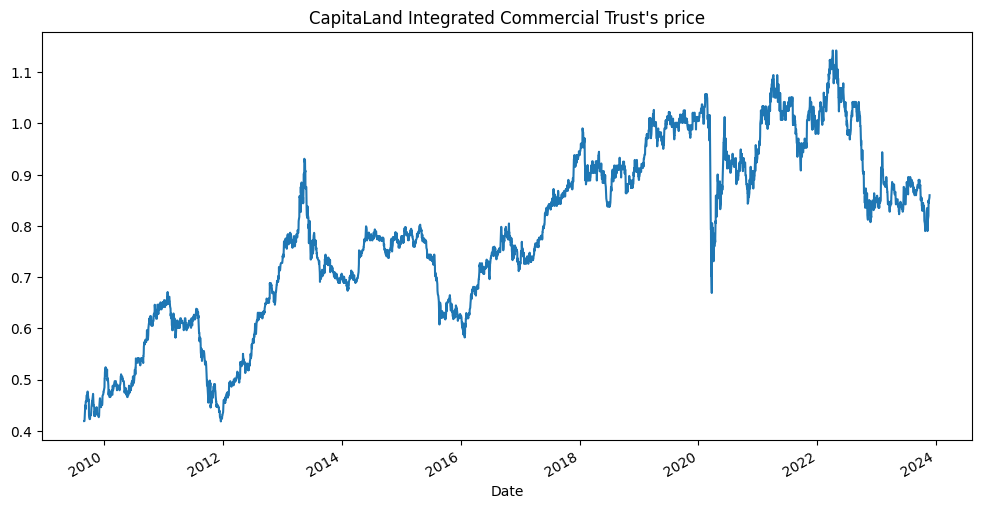

In [4]:
ticker = yf.Ticker('K71U.SI')
stock_df = ticker.history(period="max").loc['2009-09-01':]
# .loc['2009-09-01':'2019-12-31']
figure(figsize=(12, 6))
split_size = int(0.8*len(stock_df))
split_size = 0
stock_df['Close'].plot(title="CapitaLand Integrated Commercial Trust's price")

In [ ]:
stock_df.head()

Open      High       Low     Close   Volume  \
Date                                                                         
2007-11-05 00:00:00+08:00  1.262823  1.270039  1.233958  1.241174  8814211   
2007-11-06 00:00:00+08:00  1.255606  1.270038  1.219525  1.255606  6818332   
2007-11-07 00:00:00+08:00  1.255607  1.262822  1.226742  1.262822  6924926   
2007-11-09 00:00:00+08:00  1.219526  1.248391  1.212310  1.219526  9696367   
2007-11-12 00:00:00+08:00  1.212310  1.219526  1.197878  1.219526  6877143   

                           Dividends  Stock Splits  
Date                                                
2007-11-05 00:00:00+08:00        0.0           0.0  
2007-11-06 00:00:00+08:00        0.0           0.0  
2007-11-07 00:00:00+08:00        0.0           0.0  
2007-11-09 00:00:00+08:00        0.0           0.0  
2007-11-12 00:00:00+08:00        0.0           0.0

# 2. Computing trade signals

There are different types of moving averages, such as simple moving average, weighted moving average or exponential moving average. The
difference between the types is how the average is computed based on the weight assigned to data points. Simple moving average can be computed by simply taking the mean of the data points. The period to compute the moving average is a parameter. You can have a 200 days simple moving average, a 5 days simple moving average etc. Here' we compute a fast 20 days and slow 100 days moving average on the close price.

Note: Putting all the code in functions to facilitate reusability

In [ ]:
df=stock_df
# create 20 days simple moving average column
df['Fast_SMA'] = df['Close'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
df['Slow_SMA'] = df['Close'].rolling(window = 100, min_periods = 1).mean()
# display first few rows
df.head()

Open      High       Low     Close   Volume  \
Date                                                                         
2007-11-05 00:00:00+08:00  1.262823  1.270039  1.233958  1.241174  8814211   
2007-11-06 00:00:00+08:00  1.255606  1.270038  1.219525  1.255606  6818332   
2007-11-07 00:00:00+08:00  1.255607  1.262822  1.226742  1.262822  6924926   
2007-11-09 00:00:00+08:00  1.219526  1.248391  1.212310  1.219526  9696367   
2007-11-12 00:00:00+08:00  1.212310  1.219526  1.197878  1.219526  6877143   

                           Dividends  Stock Splits  Fast_SMA  Slow_SMA  
Date                                                                    
2007-11-05 00:00:00+08:00        0.0           0.0  1.241174  1.241174  
2007-11-06 00:00:00+08:00        0.0           0.0  1.248390  1.248390  
2007-11-07 00:00:00+08:00        0.0           0.0  1.253201  1.253201  
2007-11-09 00:00:00+08:00        0.0           0.0  1.244782  1.244782  
2007-11-12 00:00:00+08:00        0.0           0.0  1.239731  1.239731

There many moving average strategies that can be developed to generate trade signals. here we will use a simple moving average crossover strategy based on the SMAs we computed. A moving average can be use to indicate price trends. A crossover occurs when a faster or shorter moving average, such as the 20 days SMA crosses a slower or longer moving average, such as the 100 days SMA. This crossover  point can be used as a  indicator to buy or sell a stock.

First we create a new column ‘Signal’ such that if Fast_SMA is greater than Slow_SMA then set to 1 else set to 0.


In [ ]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['Fast_SMA'] > df['Slow_SMA'], 1.0, 0.0)

We now need to generate the buy and sell from the ‘Signal’ values. Crossover happens when the Fast_SMA and the Slow_SMA cross,  the ‘Signal’ changes from 0 to 1, or from 1 to 0. Thus we can just create a ‘Position’ value to indicate a day-to-day difference of the ‘Signal’ column.

‘Position’ = 1 implies that Signal changed from 0 to 1, meaning a faster moving average has crossed a slower moving average. This indicates a bull or up trend in the price and thus this is a buy signal.

‘Position’ = -1 implies that  Signal changed from 1 to 0, meaning a faster moving average has crossed below a slower moving average. This indicates a bear or down trend in the price and thus this is a sell signal.

In [ ]:
df['Position'] = df['Signal'].diff()
# Need to set the first row of Position to 0. Otherwise it is nan from diff function.
df['Position'].iloc[0]=0
# display first few rows
df.head()


<ipython-input-9-f0c3b8452762>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'].iloc[0]=0


Open      High       Low     Close   Volume  \
Date                                                                         
2007-11-05 00:00:00+08:00  1.262822  1.270039  1.233958  1.241174  8814211   
2007-11-06 00:00:00+08:00  1.255606  1.270038  1.219525  1.255606  6818332   
2007-11-07 00:00:00+08:00  1.255606  1.262822  1.226742  1.262822  6924926   
2007-11-09 00:00:00+08:00  1.219525  1.248390  1.212310  1.219525  9696367   
2007-11-12 00:00:00+08:00  1.212310  1.219525  1.197877  1.219525  6877143   

                           Dividends  Stock Splits  Fast_SMA  Slow_SMA  \
Date                                                                     
2007-11-05 00:00:00+08:00        0.0           0.0  1.241174  1.241174   
2007-11-06 00:00:00+08:00        0.0           0.0  1.248390  1.248390   
2007-11-07 00:00:00+08:00        0.0           0.0  1.253201  1.253201   
2007-11-09 00:00:00+08:00        0.0           0.0  1.244782  1.244782   
2007-11-12 00:00:00+08:00        0.0           0.0  1.239731  1.239731   

                           Signal  Position  
Date                                         
2007-11-05 00:00:00+08:00     0.0       0.0  
2007-11-06 00:00:00+08:00     0.0       0.0  
2007-11-07 00:00:00+08:00     0.0       0.0  
2007-11-09 00:00:00+08:00     0.0       0.0  
2007-11-12 00:00:00+08:00     0.0       0.0

<Axes: xlabel='Date'>

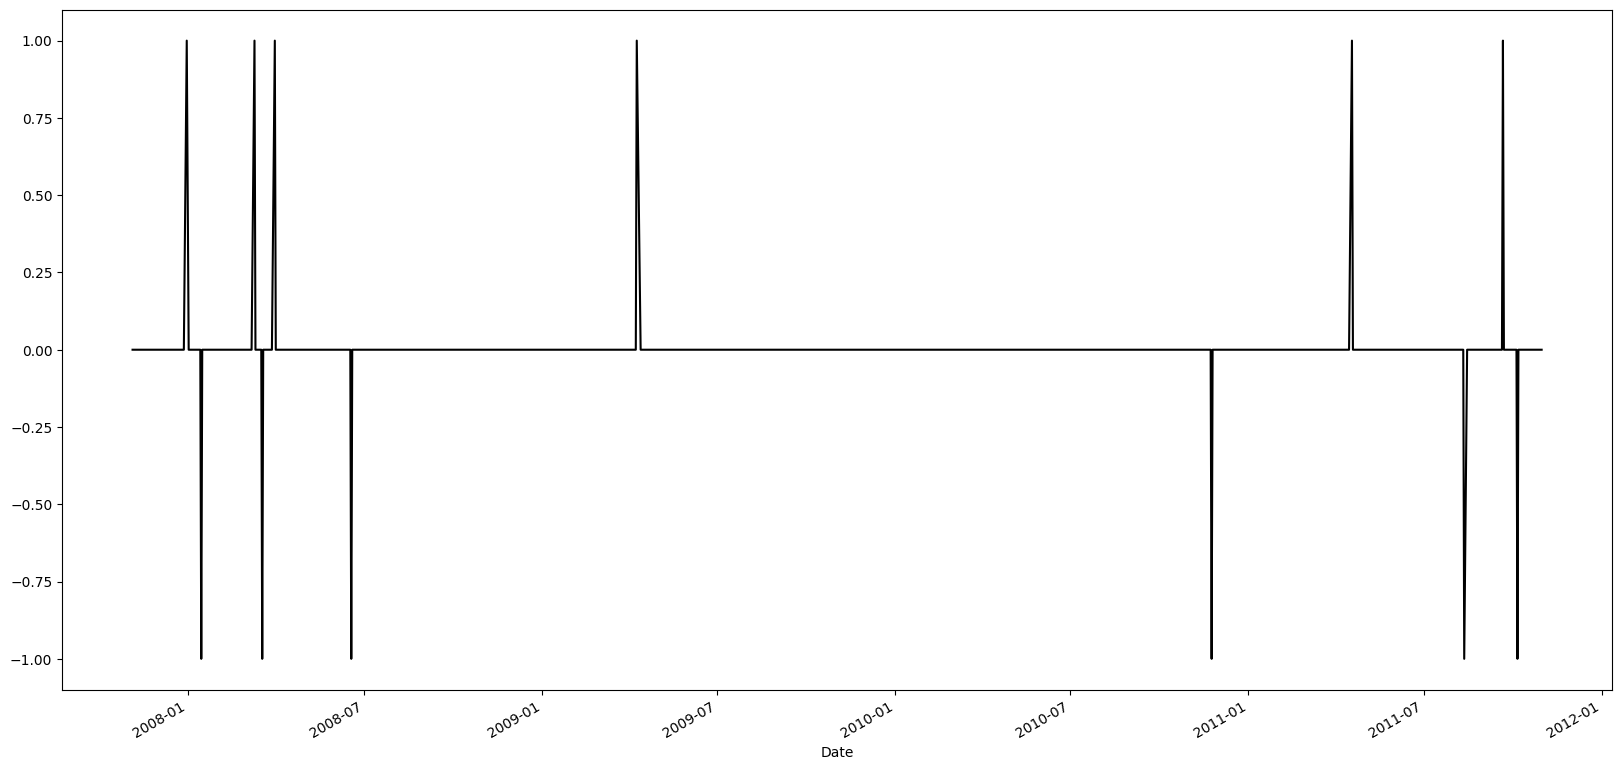

In [ ]:
# Plot the positions
plt.figure(figsize = (20,10))
df.iloc[0:1000]['Position'].plot(color = 'k', label= 'Position')


Next we need to change the position signal to trade signals. Although position can give us this information, we want the change in the trade signal, which is the change from -1 to 1 to indicate a buy, and 1 to -1 to indicate a sell. This is for computing the Multiplicative Portfolio Returns.

0.0


<Axes: xlabel='Date'>

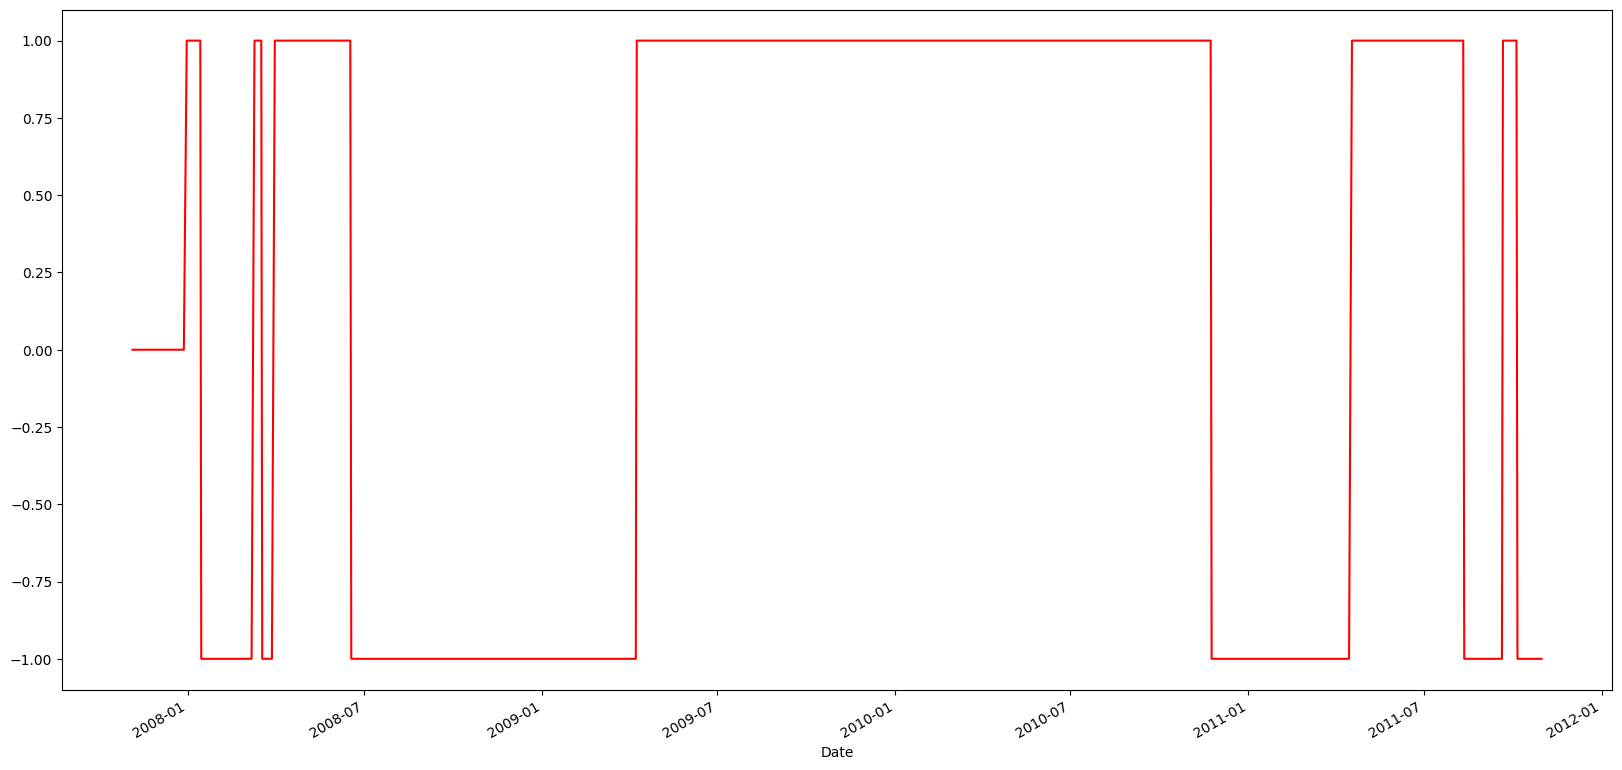

In [ ]:
plt.figure(figsize = (20,10))
df['Trade'] = df['Position']
prevrow = df.iloc[0]
print(prevrow['Position'])
for index, row in df.iloc[1:].iterrows():
  if row['Trade']==0:
    if prevrow['Trade']!=0:
      df.at[index,'Trade']=prevrow['Trade']
      row['Trade']=prevrow['Trade']
  prevrow=row
df.iloc[0:1000]['Trade'].plot(color = 'r', label= 'Trade')

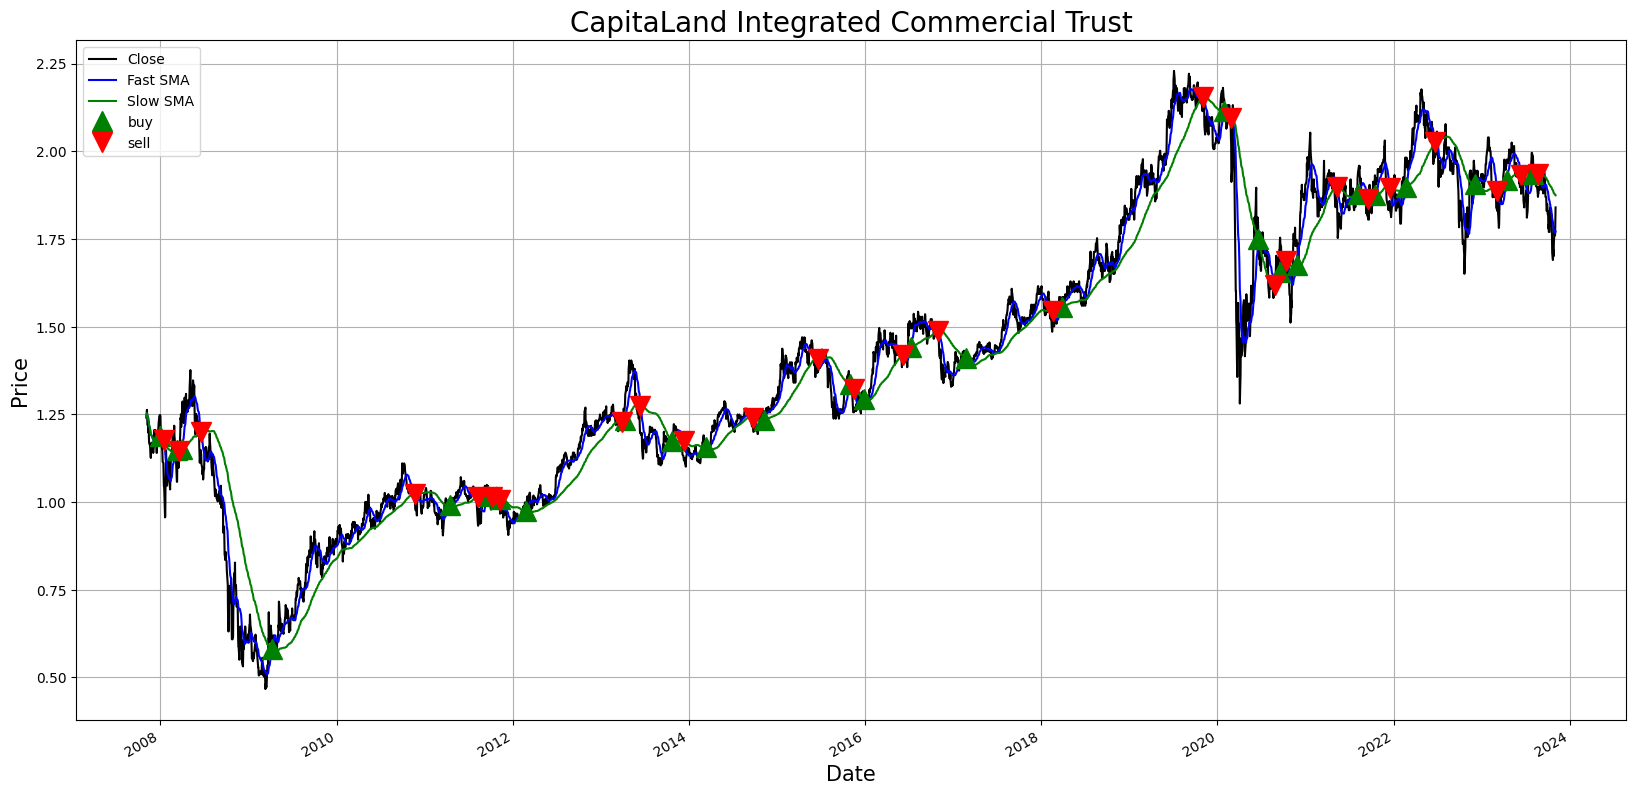

In [ ]:
# plot close price, Fast and Slow simple moving averages
def plotprice(df):
  plt.figure(figsize = (20,10))
  df['Close'].plot(color = 'k', label= 'Close')
  df['Fast_SMA'].plot(color = 'b', label = 'Fast SMA')
  df['Slow_SMA'].plot(color = 'g', label = 'Slow SMA')
  # plot buy signals
  plt.plot(df[df['Position'] == 1].index, df['Fast_SMA'][df['Position'] == 1], '^', markersize = 15, color = 'g', label = 'buy')
  # plot sell signals
  plt.plot(df[df['Position'] == -1].index, df['Fast_SMA'][df['Position'] == -1], 'v', markersize = 15, color = 'r', label = 'sell')
  plt.ylabel('Price', fontsize = 15 )
  plt.xlabel('Date', fontsize = 15 )
  plt.title('CapitaLand Integrated Commercial Trust', fontsize = 20)
  plt.legend()
  plt.grid()
  plt.show()

plotprice(df)

It is not very clear in the plot above since it included the prices of many years. Lets zoom in to take a closer look.

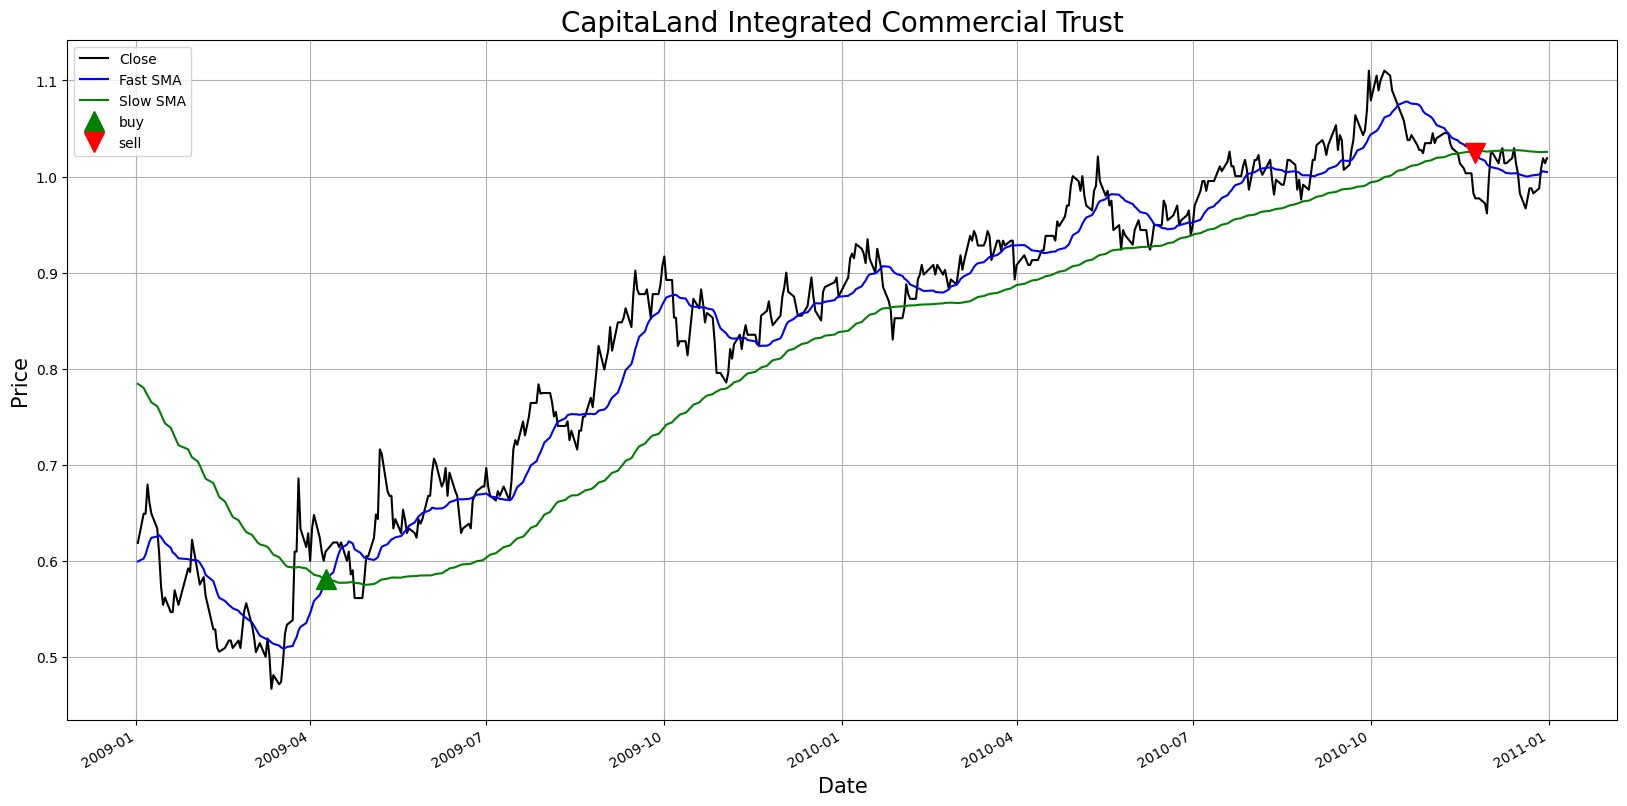

In [ ]:
sdf=df.loc['2009-01-01':'2010-12-31']
plotprice(sdf)


Notice that there is a buy at Apr 2009, but the buy and sell are performed at almost the same price at around May 2010. Since each trade incurs a transaction cost, trades at around the same price will result in losses. Hence a better trading strategy can be implemented, such as the introduction of a moving average band to reduce the number of trades around the same price. Refer to the paper on this for more details.

# 3. Computing portfolio returns

The computation of portfolio returns in this section is based on the multiplicative returns given by (refer equation 11 of the reference paper)

$\begin{equation}
R(T)=\{1+F(T-1)r(T)\}\{1-\delta|F(T)-F(T-1)|\}
\end{equation}$

where $r(T)=(y(T)/y(T-1))-1$; $y(T)$ is the closing price at time $T$; $F(T)$ is the action from the trading system; and $\delta$ is the transaction rate.

The multplicative profits $R$ can computed using

$\begin{equation}
R=\prod\limits_{T = 1}^{n} R(T)
\end{equation}$

where $n$ is the total number of time points.


In [ ]:
df['Returns']=1.0
print(df.iloc[1]['Trade'])

def computereturns(tdf,trate):
  prevrow = tdf.iloc[0]
  returncol=tdf.columns.get_loc('Returns')
  for i in range(len(tdf)):
    if i==0:
      prev_i=i
    else:
      prevrow=tdf.iloc[prev_i]
      row=tdf.iloc[i]
      rt=(row['Close']/prevrow['Close'])-1
      t=prevrow['Returns']*(1+prevrow['Trade']*rt)*(1-trate*abs(row['Trade']-prevrow['Trade']))
      tdf.iat[i,returncol]=t
      prev_i=i
  return tdf

df=computereturns(df,0.005)
plt.figure(figsize = (20,10))
#df.iloc[1:1000]['Returns'].plot(color = 'k', label= 'Returns')
df['Returns'].plot(color = 'k', label= 'Returns')


NameError: ignored

Notice in the above plot that some times the portfolio returns dropped below 1.0, some times it rises above 2.0. Hence this shows that the choice of trading strategy and parameters are very important to yield either profits or losses. Above 1.0 indicates there is overall profit. Less than 1.0 indicates there is a loss.


In [ ]:
# plot close price, Fast and Slow simple moving averages
def plotprice(df):
  plt.figure(figsize = (20,10))
  df['Close'].plot(color = 'k', label= 'Close')
  df['Fast_SMA'].plot(color = 'b', label = 'Fast SMA')
  df['Slow_SMA'].plot(color = 'g', label = 'Slow SMA')
  # plot buy signals
  plt.plot(df[df['Position'] == 1].index, df['Fast_SMA'][df['Position'] == 1], '^', markersize = 15, color = 'g', label = 'buy')
  # plot sell signals
  plt.plot(df[df['Position'] == -1].index, df['Fast_SMA'][df['Position'] == -1], 'v', markersize = 15, color = 'r', label = 'sell')
  plt.ylabel('Price', fontsize = 15 )
  plt.xlabel('Date', fontsize = 15 )
  plt.title('CapitaLand Integrated Commercial Trust', fontsize = 20)
  plt.legend()
  plt.grid()
  plt.show()


In [ ]:
def computereturns(tdf,trate):
  tdf['Returns']=1.0
  prevrow = tdf.iloc[0]
  returncol=tdf.columns.get_loc('Returns')
  for i in range(len(tdf)):
    if i==0:
      prev_i=i
    else:
      prevrow=tdf.iloc[prev_i]
      row=tdf.iloc[i]
      rt=(row['Close']/prevrow['Close'])-1
      t=prevrow['Returns']*(1+prevrow['Trade']*rt)*(1-trate*abs(row['Trade']-prevrow['Trade']))
      tdf.iat[i,returncol]=t
      prev_i=i
  return tdf


In [ ]:
def compute_tradeSignal_portfolioReturn(df, rate = 0.005):
  # create 20 days simple moving average column
  df['Fast_SMA'] = df['Close'].rolling(window = 20, min_periods = 1).mean()
  # create  days simple moving average column
  df['Slow_SMA'] = df['Close'].rolling(window = 50, min_periods = 1).mean()
  df['Signal'] = 0.0
  df['Signal'] = np.where(df['Fast_SMA'] > df['Slow_SMA'], 1.0, 0.0)
  df['Position'] = df['Signal'].diff()
  # Need to set the first row of Position to 0. Otherwise it is nan from diff function.
  df['Position'].iloc[0]=0
  # # display first few rows
  # df.head()
  # Plot the positions
  plt.figure(figsize = (20,10))
  df['Position'].plot(color = 'k', label= 'Position')
  plt.figure(figsize = (20,10))
  df['Trade'] = df['Position']
  prevrow = df.iloc[0]
  print(prevrow['Position'])
  for index, row in df.iloc[1:].iterrows():
    if row['Trade']==0:
      if prevrow['Trade']!=0:
        df.at[index,'Trade']=prevrow['Trade']
        row['Trade']=prevrow['Trade']
    prevrow=row
  df['Trade'].plot(color = 'r', label= 'Trade')
  plotprice(df)
  tdf = computereturns(df,rate)
  return tdf




In [ ]:
df = stock_df.copy(deep = True)
df

Open      High       Low     Close    Volume  \
Date                                                                          
2007-11-05 00:00:00+08:00  1.262823  1.270039  1.233958  1.241174   8814211   
2007-11-06 00:00:00+08:00  1.255607  1.270039  1.219526  1.255607   6818332   
2007-11-07 00:00:00+08:00  1.255607  1.262823  1.226742  1.262823   6924926   
2007-11-09 00:00:00+08:00  1.219526  1.248391  1.212310  1.219526   9696367   
2007-11-12 00:00:00+08:00  1.212310  1.219526  1.197878  1.219526   6877143   
...                             ...       ...       ...       ...       ...   
2023-11-06 00:00:00+08:00  1.850000  1.870000  1.840000  1.860000  16633500   
2023-11-07 00:00:00+08:00  1.850000  1.850000  1.830000  1.840000  11226400   
2023-11-08 00:00:00+08:00  1.820000  1.840000  1.800000  1.830000  12093600   
2023-11-09 00:00:00+08:00  1.820000  1.840000  1.810000  1.820000  13988400   
2023-11-10 00:00:00+08:00  1.800000  1.820000  1.790000  1.790000   8402000   

                           Dividends  Stock Splits  
Date                                                
2007-11-05 00:00:00+08:00        0.0           0.0  
2007-11-06 00:00:00+08:00        0.0           0.0  
2007-11-07 00:00:00+08:00        0.0           0.0  
2007-11-09 00:00:00+08:00        0.0           0.0  
2007-11-12 00:00:00+08:00        0.0           0.0  
...                              ...           ...  
2023-11-06 00:00:00+08:00        0.0           0.0  
2023-11-07 00:00:00+08:00        0.0           0.0  
2023-11-08 00:00:00+08:00        0.0           0.0  
2023-11-09 00:00:00+08:00        0.0           0.0  
2023-11-10 00:00:00+08:00        0.0           0.0  

[4021 rows x 7 columns]

In [ ]:
stock_df = df.loc['2009-09-01':'2019-12-31']
split_size = int(0.8*len(stock_df))
train_test_df = stock_df[:split_size].copy(deep=True)
val_df = stock_df[split_size:].copy(deep=True)

In [ ]:
val_df

Open      High       Low     Close    Volume  \
Date                                                                          
2017-12-08 00:00:00+08:00  1.570311  1.570311  1.562797  1.562797   6377200   
2017-12-11 00:00:00+08:00  1.562797  1.577824  1.562797  1.570310   6004400   
2017-12-12 00:00:00+08:00  1.577824  1.592851  1.570310  1.577824   8883000   
2017-12-13 00:00:00+08:00  1.592851  1.607878  1.585337  1.592851  11265000   
2017-12-14 00:00:00+08:00  1.592851  1.600364  1.570310  1.592851   7024800   
...                             ...       ...       ...       ...       ...   
2019-12-25 00:00:00+08:00  2.022821  2.022821  2.022821  2.022821         0   
2019-12-26 00:00:00+08:00  2.031145  2.031145  2.006172  2.031145   4264000   
2019-12-27 00:00:00+08:00  2.031145  2.047794  2.031145  2.039469   4348400   
2019-12-30 00:00:00+08:00  2.047794  2.047794  2.022821  2.039469   3143000   
2019-12-31 00:00:00+08:00  2.022821  2.056118  2.022821  2.047794   4710400   

                           Dividends  Stock Splits  
Date                                                
2017-12-08 00:00:00+08:00        0.0           0.0  
2017-12-11 00:00:00+08:00        0.0           0.0  
2017-12-12 00:00:00+08:00        0.0           0.0  
2017-12-13 00:00:00+08:00        0.0           0.0  
2017-12-14 00:00:00+08:00        0.0           0.0  
...                              ...           ...  
2019-12-25 00:00:00+08:00        0.0           0.0  
2019-12-26 00:00:00+08:00        0.0           0.0  
2019-12-27 00:00:00+08:00        0.0           0.0  
2019-12-30 00:00:00+08:00        0.0           0.0  
2019-12-31 00:00:00+08:00        0.0           0.0  

[519 rows x 7 columns]

In [ ]:
def random_walk(df):
  rm_pred = df.shift(1, axis = 0)
  return rm_pred

<ipython-input-15-33b6562e5f1e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'].iloc[0]=0


0.0


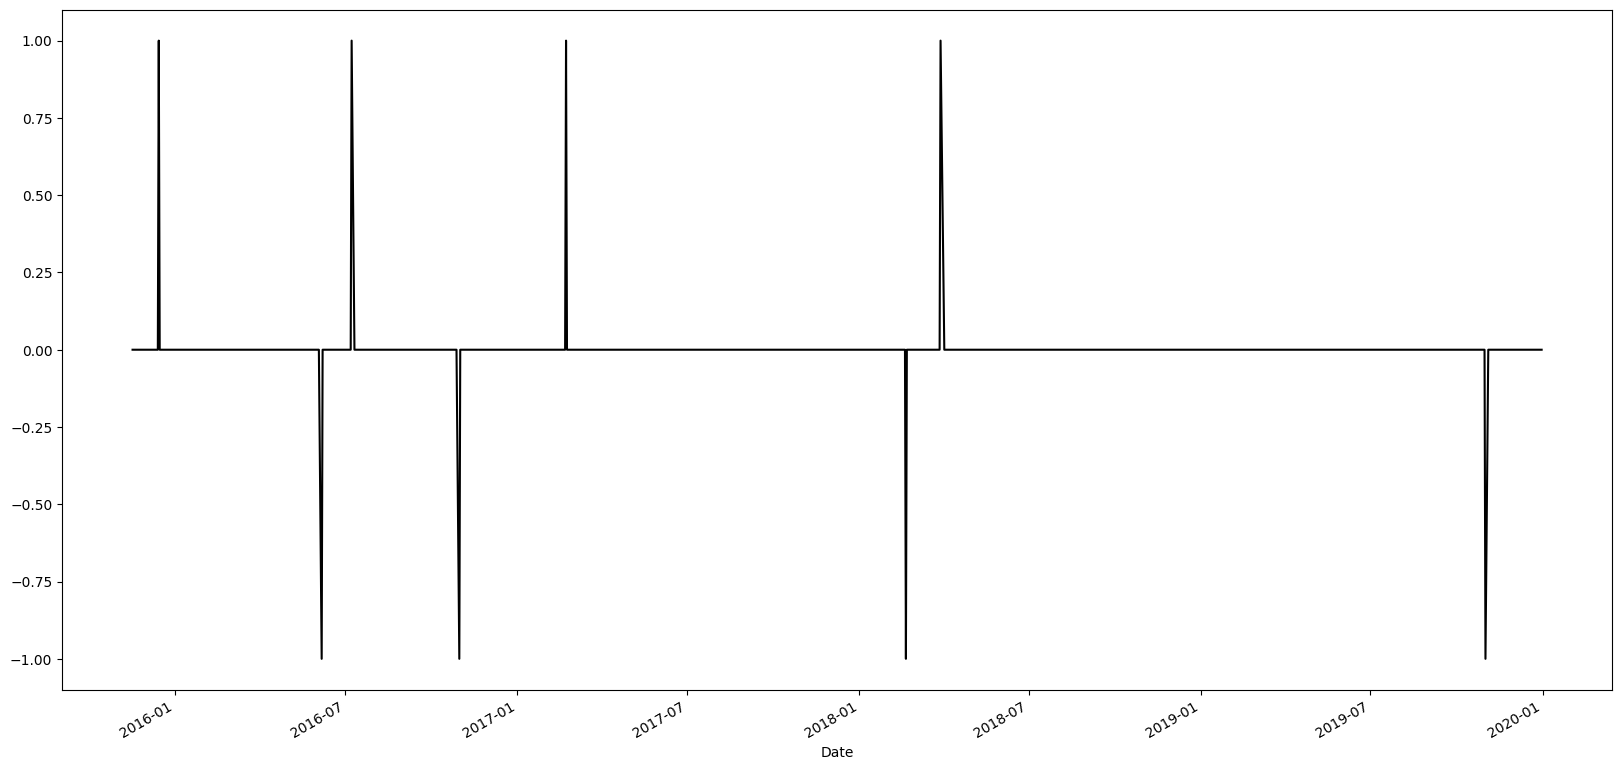

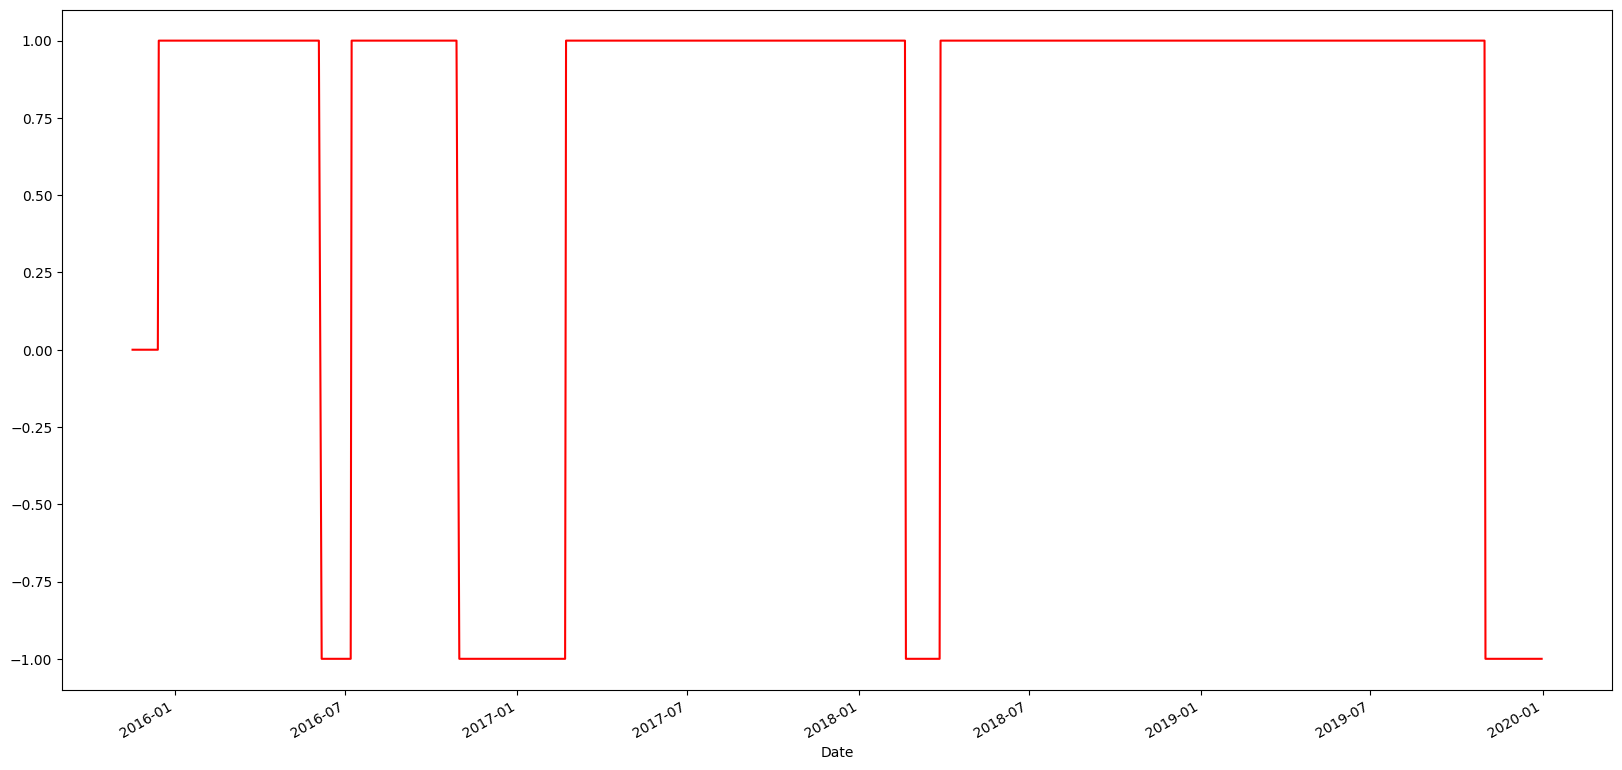

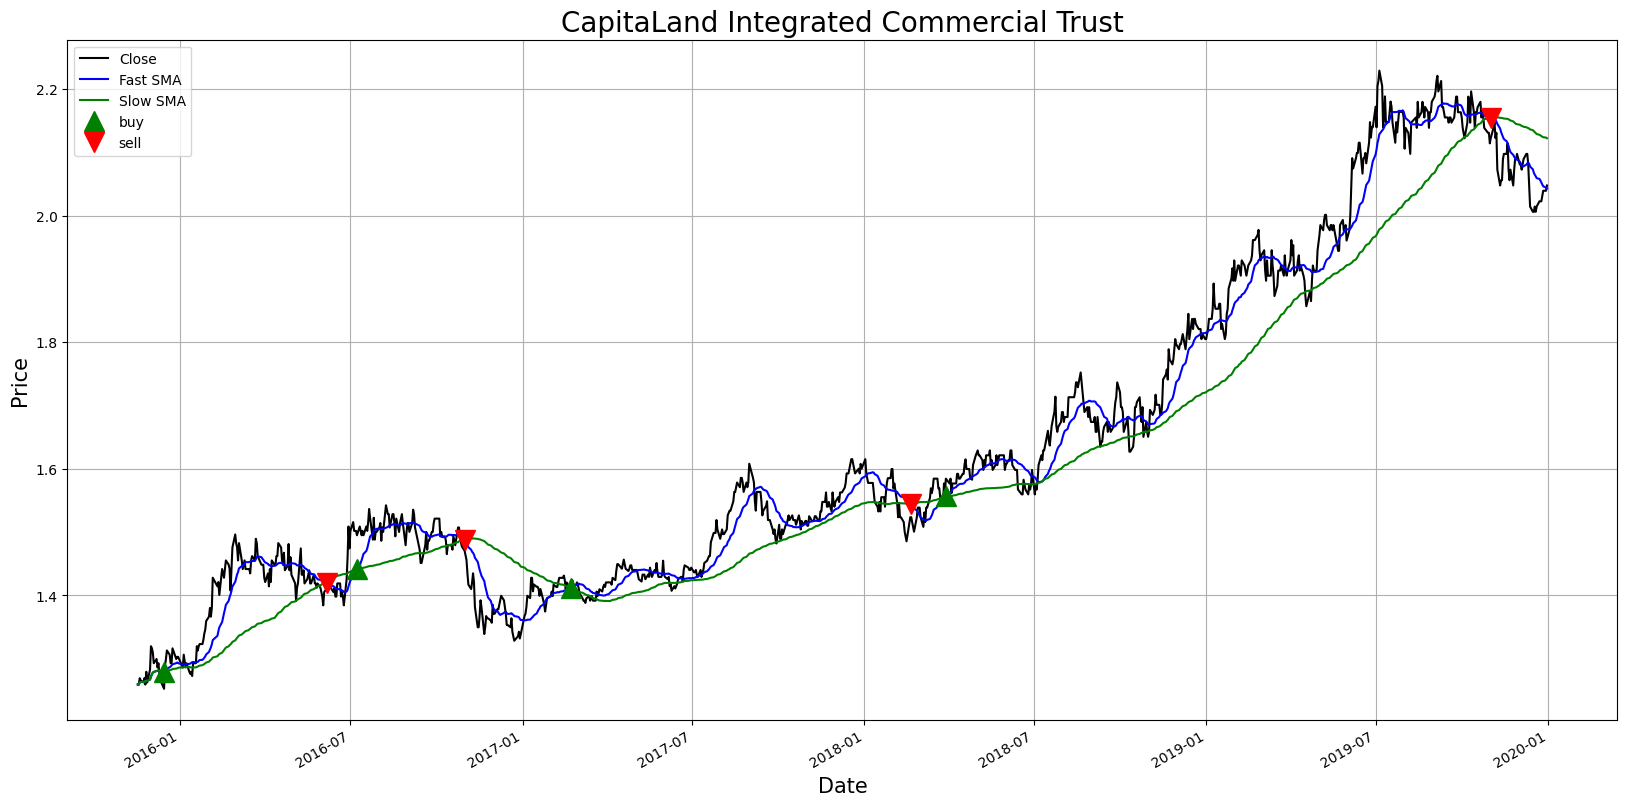

Streaming output truncated to the last 5000 lines.
2015-11-18 00:00:00+08:00     0.0       0.0    0.0      1.0  
2015-11-19 00:00:00+08:00     0.0       0.0    0.0      1.0  
2015-11-20 00:00:00+08:00     0.0       0.0    0.0      1.0  
2015-11-23 00:00:00+08:00     0.0       0.0    0.0      1.0  
...                           ...       ...    ...      ...  
2019-12-25 00:00:00+08:00     0.0       0.0   -1.0      1.0  
2019-12-26 00:00:00+08:00     0.0       0.0   -1.0      1.0  
2019-12-27 00:00:00+08:00     0.0       0.0   -1.0      1.0  
2019-12-30 00:00:00+08:00     0.0       0.0   -1.0      1.0  
2019-12-31 00:00:00+08:00     0.0       0.0   -1.0      1.0  

[1038 rows x 13 columns]
                               Open      High       Low     Close   Volume  \
Date                                                                         
2015-11-17 00:00:00+08:00  1.262610  1.272711  1.259243  1.259243  7000600   
2015-11-18 00:00:00+08:00  1.255876  1.269344  1.255876  1.259243  59

<Axes: title={'center': 'Random Walk Returns'}, xlabel='Date'>

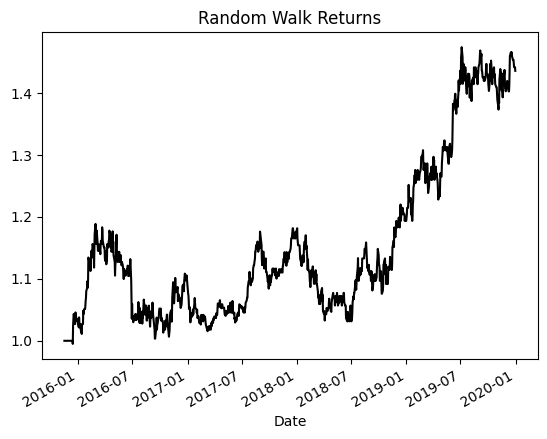

In [ ]:
ideal_df = compute_tradeSignal_portfolioReturn(val_df)
ideal_df['Returns'].plot(color = 'k', label= 'Returns', title = 'Random Walk Returns')

<Axes: title={'center': 'Ideal Returns'}, xlabel='Date'>

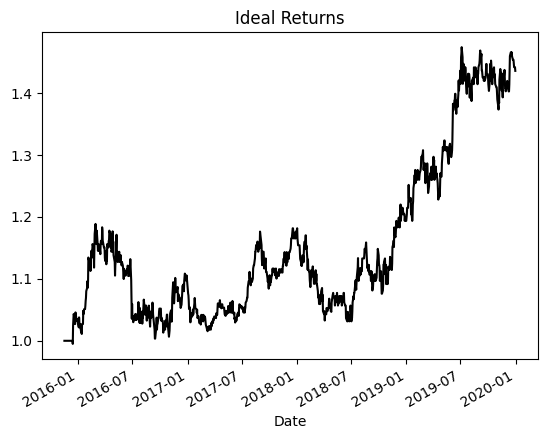

In [ ]:
ideal_df['Returns'].plot(color = 'k', label= 'Returns', title = 'Ideal Returns')


0.0


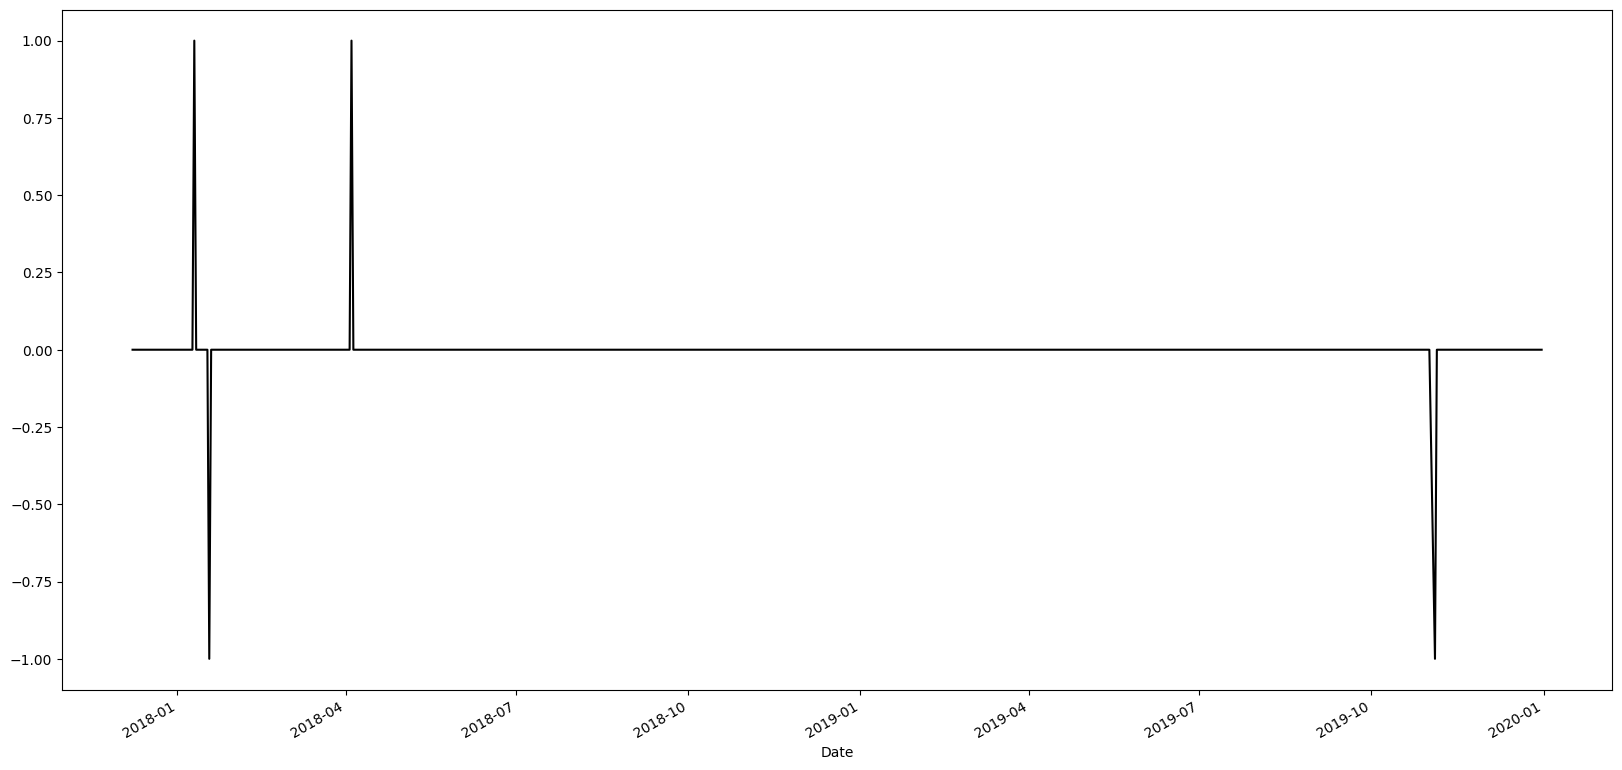

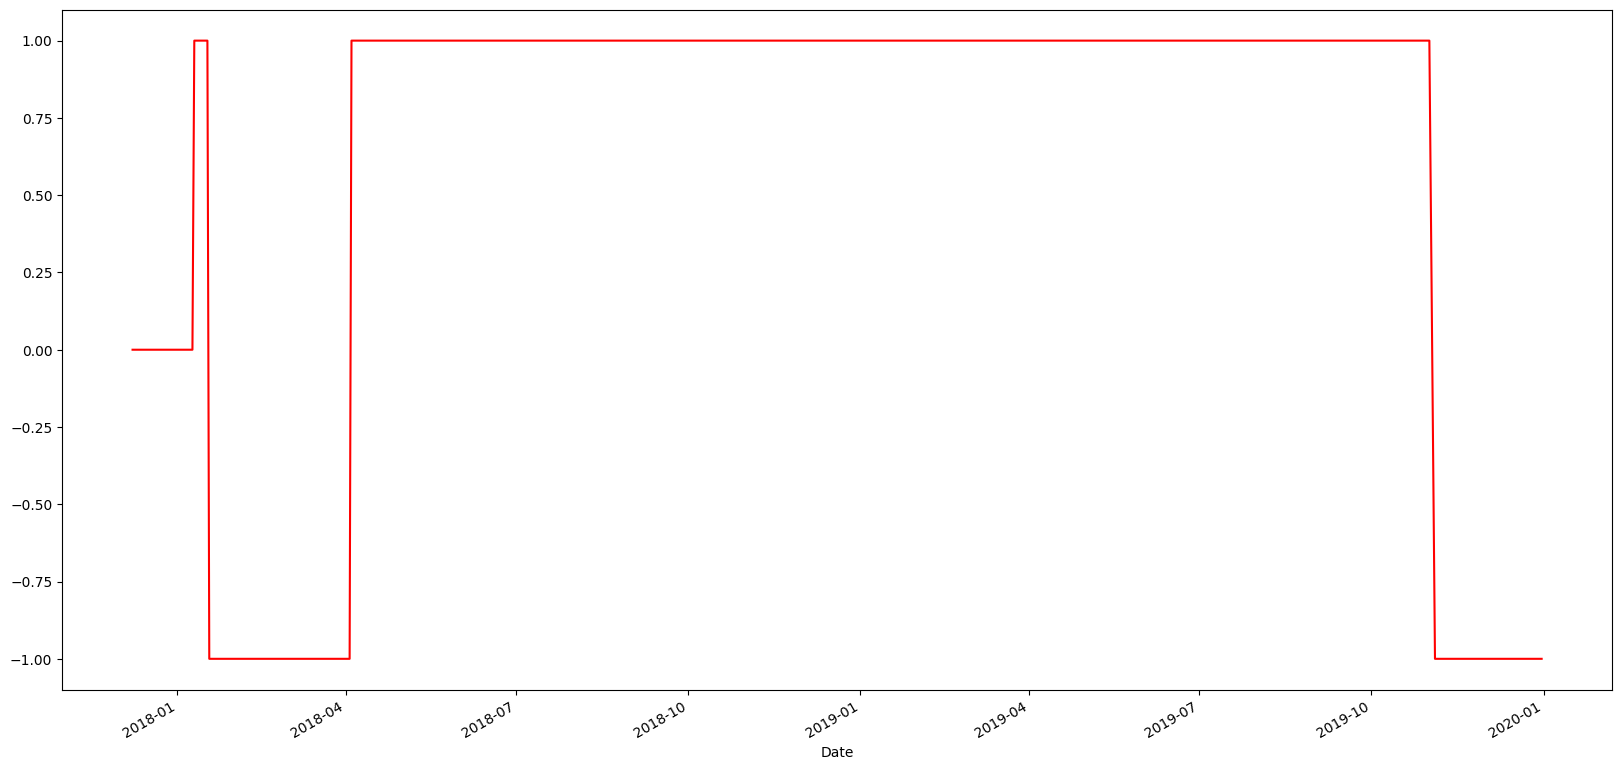

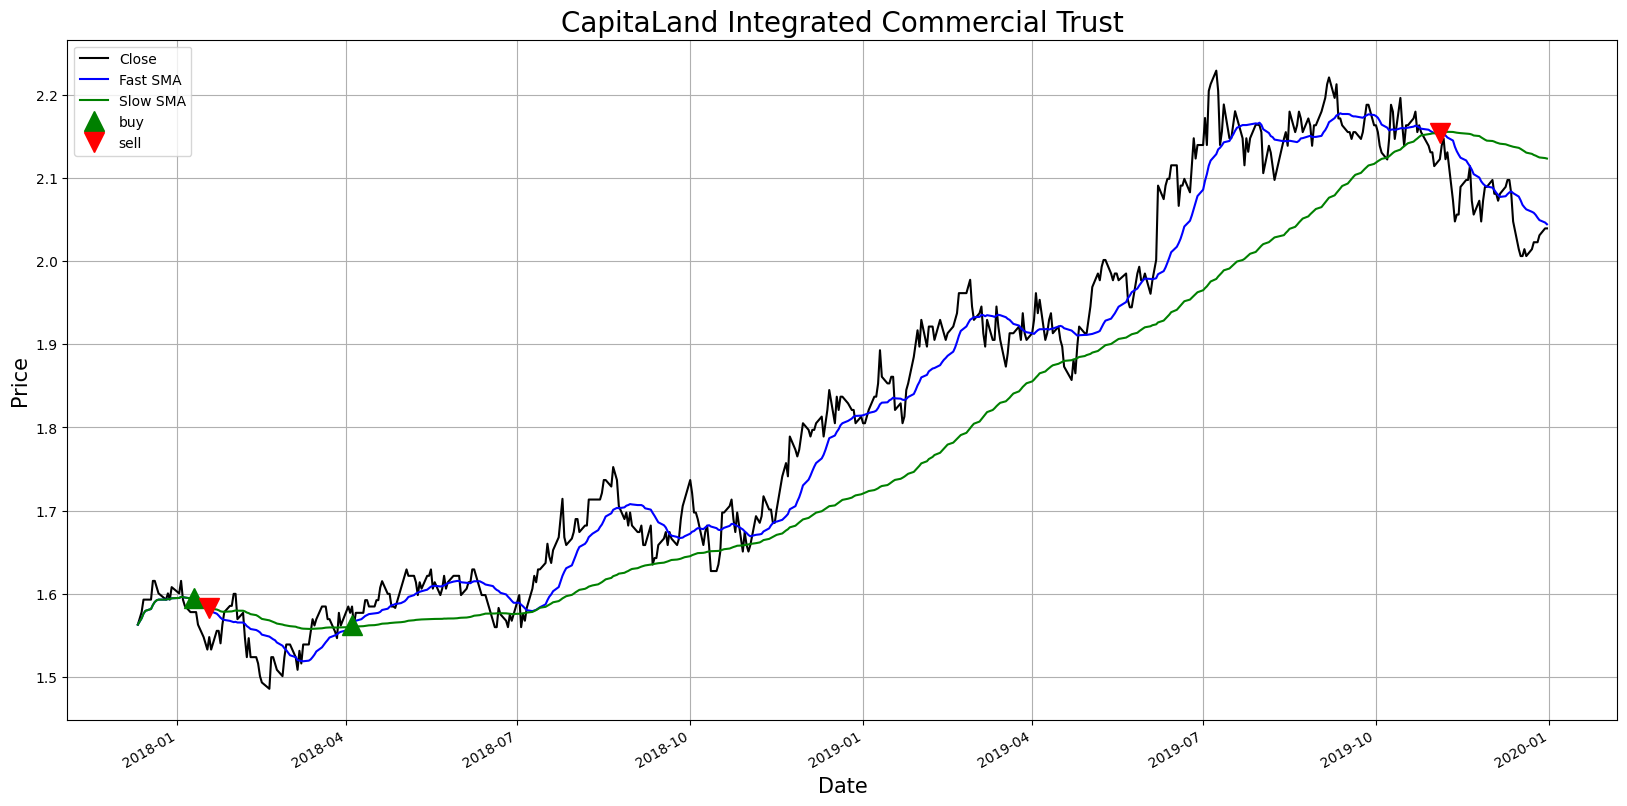

Streaming output truncated to the last 5000 lines.
2017-12-11 00:00:00+08:00     0.0       0.0    0.0      NaN  
2017-12-12 00:00:00+08:00     0.0       0.0    0.0      NaN  
2017-12-13 00:00:00+08:00     0.0       0.0    0.0      NaN  
2017-12-14 00:00:00+08:00     0.0       0.0    0.0      NaN  
...                           ...       ...    ...      ...  
2019-12-25 00:00:00+08:00     0.0       0.0   -1.0      1.0  
2019-12-26 00:00:00+08:00     0.0       0.0   -1.0      1.0  
2019-12-27 00:00:00+08:00     0.0       0.0   -1.0      1.0  
2019-12-30 00:00:00+08:00     0.0       0.0   -1.0      1.0  
2019-12-31 00:00:00+08:00     0.0       0.0   -1.0      1.0  

[519 rows x 13 columns]
                               Open      High       Low     Close      Volume  \
Date                                                                            
2017-12-08 00:00:00+08:00       NaN       NaN       NaN       NaN         NaN   
2017-12-11 00:00:00+08:00  1.570311  1.570311  1.562797  1.56

<Axes: title={'center': 'Random Walk Returns'}, xlabel='Date'>

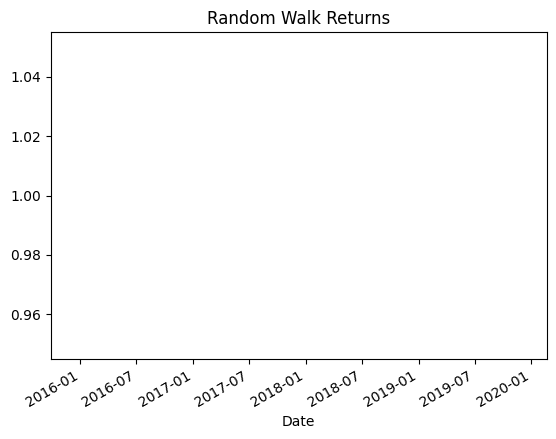

In [ ]:
random_walk_df = random_walk(val_df)
random_walk_df = compute_tradeSignal_portfolioReturn(random_walk_df)
random_walk_df['Returns'].plot(color = 'k', label= 'Returns', title = 'Random Walk Returns')


In [ ]:
random_walk_df[random_walk_df["Returns"].notnull()]

Open  High  Low  Close  Volume  Dividends  \
Date                                                                   
2017-12-08 00:00:00+08:00   NaN   NaN  NaN    NaN     NaN        NaN   

                           Stock Splits  Fast_SMA  Slow_SMA  Signal  Position  \
Date                                                                            
2017-12-08 00:00:00+08:00           NaN       NaN       NaN     0.0       0.0   

                           Trade  Returns  
Date                                       
2017-12-08 00:00:00+08:00    0.0      1.0

In [ ]:
val_df

Open      High       Low     Close    Volume  \
Date                                                                          
2017-12-08 00:00:00+08:00  1.570311  1.570311  1.562797  1.562797   6377200   
2017-12-11 00:00:00+08:00  1.562797  1.577824  1.562797  1.570310   6004400   
2017-12-12 00:00:00+08:00  1.577824  1.592851  1.570310  1.577824   8883000   
2017-12-13 00:00:00+08:00  1.592851  1.607878  1.585337  1.592851  11265000   
2017-12-14 00:00:00+08:00  1.592851  1.600364  1.570310  1.592851   7024800   
...                             ...       ...       ...       ...       ...   
2019-12-25 00:00:00+08:00  2.022821  2.022821  2.022821  2.022821         0   
2019-12-26 00:00:00+08:00  2.031145  2.031145  2.006172  2.031145   4264000   
2019-12-27 00:00:00+08:00  2.031145  2.047794  2.031145  2.039469   4348400   
2019-12-30 00:00:00+08:00  2.047794  2.047794  2.022821  2.039469   3143000   
2019-12-31 00:00:00+08:00  2.022821  2.056118  2.022821  2.047794   4710400   

                           Dividends  Stock Splits  
Date                                                
2017-12-08 00:00:00+08:00        0.0           0.0  
2017-12-11 00:00:00+08:00        0.0           0.0  
2017-12-12 00:00:00+08:00        0.0           0.0  
2017-12-13 00:00:00+08:00        0.0           0.0  
2017-12-14 00:00:00+08:00        0.0           0.0  
...                              ...           ...  
2019-12-25 00:00:00+08:00        0.0           0.0  
2019-12-26 00:00:00+08:00        0.0           0.0  
2019-12-27 00:00:00+08:00        0.0           0.0  
2019-12-30 00:00:00+08:00        0.0           0.0  
2019-12-31 00:00:00+08:00        0.0           0.0  

[519 rows x 7 columns]

<Axes: title={'center': 'Random Walk Returns'}, xlabel='Date'>

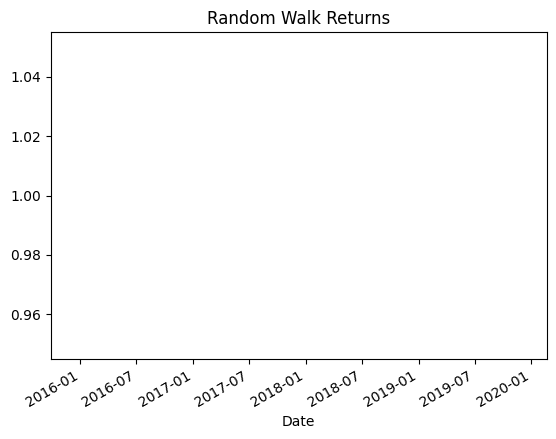

In [ ]:
random_walk_df['Returns'].plot(color = 'k', label= 'Returns', title = 'Random Walk Returns')


# Final Code

In [2]:
# Installing all the required packages
!pip install yfinance
!pip install yahoofinancials
!pip install mpld3
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.17-py3-none-any.whl size=31921 sha256=40691092c14cd4a7120bfd3ffb5d397a1b3822d01bd7141fd37c8e182d01a8dc
  Stored in directory: /root/.cache/pip/wheels/f3/a0/02/827b28a2cd0ee24a98920f0700f34dd3b23373e046fef4c860
Successfully built yahoofinancials
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=a908e510f956f1ceb70977c2c3854fa669dbf79a868c88091d3d219a0f2de6b5
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [3]:
# importing all the required packages
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from yahoofinancials import YahooFinancials
%matplotlib inline
import mpld3
import skfuzzy as fuzz
import datetime as dt
import os
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
mpld3.enable_notebook()
from sklearn.metrics import mean_squared_error


Get the data and split it into training, testing and validation datasets

In [4]:
# Define the sequence length
seq_length = 25
df = yf.download('K71U.SI')
# Adding a column close stationary to store the stationary close price time series
df["Close_stat"]  = df["Close"].diff()
# Adding a column Volume stationary to store the stationary Volume time series
df["Volume_stat"]  = df["Volume"].diff()
stock_df = df.loc['2009-09-01':'2023-01-31']
# Splitting the dataset into training and test dataset
split_size = int(0.9*len(stock_df))
train_val_df = stock_df[:split_size].copy(deep=True)
test_df = stock_df[split_size:].copy(deep=True)
df.head()

[*********************100%%**********************]  1 of 1 completed


Open      High       Low     Close  Adj Close  Volume  \
Date                                                                    
2007-11-06  2.142851  2.142851  2.126493  2.134672   0.827818  119821   
2007-11-07  2.134672  2.200103  2.134672  2.175566   0.843676   47684   
2007-11-09  2.208282  2.208282  2.159209  2.191924   0.850020   35457   
2007-11-12  2.159209  2.159209  2.085599  2.085599   0.808787  121044   
2007-11-13  2.093778  2.110136  2.085599  2.093778   0.811959  118598   

            Close_stat  Volume_stat  
Date                                 
2007-11-06         NaN          NaN  
2007-11-07    0.040894     -72137.0  
2007-11-09    0.016358     -12227.0  
2007-11-12   -0.106325      85587.0  
2007-11-13    0.008179      -2446.0

Adding all the required functions

In [5]:
# plot close price, Fast and Slow simple moving averages
def plotprice(df, title, pred_col):
  plt.figure(figsize = (20,10))
  df['Close'].plot(color = 'gray', label= 'Close')
  df[pred_col].plot(color = 'k', label= 'Predicted Close')
  df['Fast_SMA'].plot(color = 'b', label = 'Fast SMA')
  df['Slow_SMA'].plot(color = 'g', label = 'Slow SMA')
  # plot buy signals
  plt.plot(df[df['Position'] == 1].index, df['Fast_SMA'][df['Position'] == 1], '^', markersize = 15, color = 'g', label = 'buy')
  # plot sell signals
  plt.plot(df[df['Position'] == -1].index, df['Fast_SMA'][df['Position'] == -1], 'v', markersize = 15, color = 'r', label = 'sell')
  plt.ylabel('Price', fontsize = 15 )
  plt.xlabel('Date', fontsize = 15 )
  plt.title(title, fontsize = 20)
  plt.legend()
  plt.grid()
  plt.show()

# function to compute the returns
def computereturns(tdf,trate):
  tdf['Returns']=1.0
  prevrow = tdf.iloc[0]
  returncol=tdf.columns.get_loc('Returns')
  for i in range(len(tdf)):
    if i==0:
      prev_i=i
    else:
      prevrow=tdf.iloc[prev_i]
      row=tdf.iloc[i]
      rt=(row['Close']/prevrow['Close'])-1
      t=prevrow['Returns']*(1+prevrow['Trade']*rt)*(1-trate*abs(row['Trade']-prevrow['Trade']))
      tdf.iat[i,returncol]=t
      prev_i=i
  return tdf


def compute_tradeSignal_portfolioReturn(df, title, pred_col = 'Close', rate = 0.005):
  # create 20 days simple moving average column
  df['Fast_SMA'] = df[pred_col].rolling(window = 20, min_periods = 1).mean()
  # create  days simple moving average column
  df['Slow_SMA'] = df[pred_col].rolling(window = 50, min_periods = 1).mean()
  df['Signal'] = 0.0
  df['Signal'] = np.where(df['Fast_SMA'] > df['Slow_SMA'], 1.0, 0.0)
  df['Position'] = df['Signal'].diff()
  # Need to set the first row of Position to 0. Otherwise it is nan from diff function.
  df['Position'].iloc[0]=0
  df['Trade'] = df['Position']
  prevrow = df.iloc[0]
  print(prevrow['Position'])
  for index, row in df.iloc[1:].iterrows():
    if row['Trade']==0:
      if prevrow['Trade']!=0:
        df.at[index,'Trade']=prevrow['Trade']
        row['Trade']=prevrow['Trade']
    prevrow=row
  plotprice(df, title, pred_col)
  tdf = computereturns(df,rate)
  return tdf

# make the given dataframe column stationary
def make_stationary(col):
  stat_col = col.diff()
  return stat_col

# make the given column non-stationary from stationary
def undo_stat(col, start_value):
  col = np.insert(col, 0 , start_value)
  col = np.cumsum(col)
  col = col[1:]
  return col


## Ideal Case

0.0


<ipython-input-5-5eb510c56194>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'].iloc[0]=0


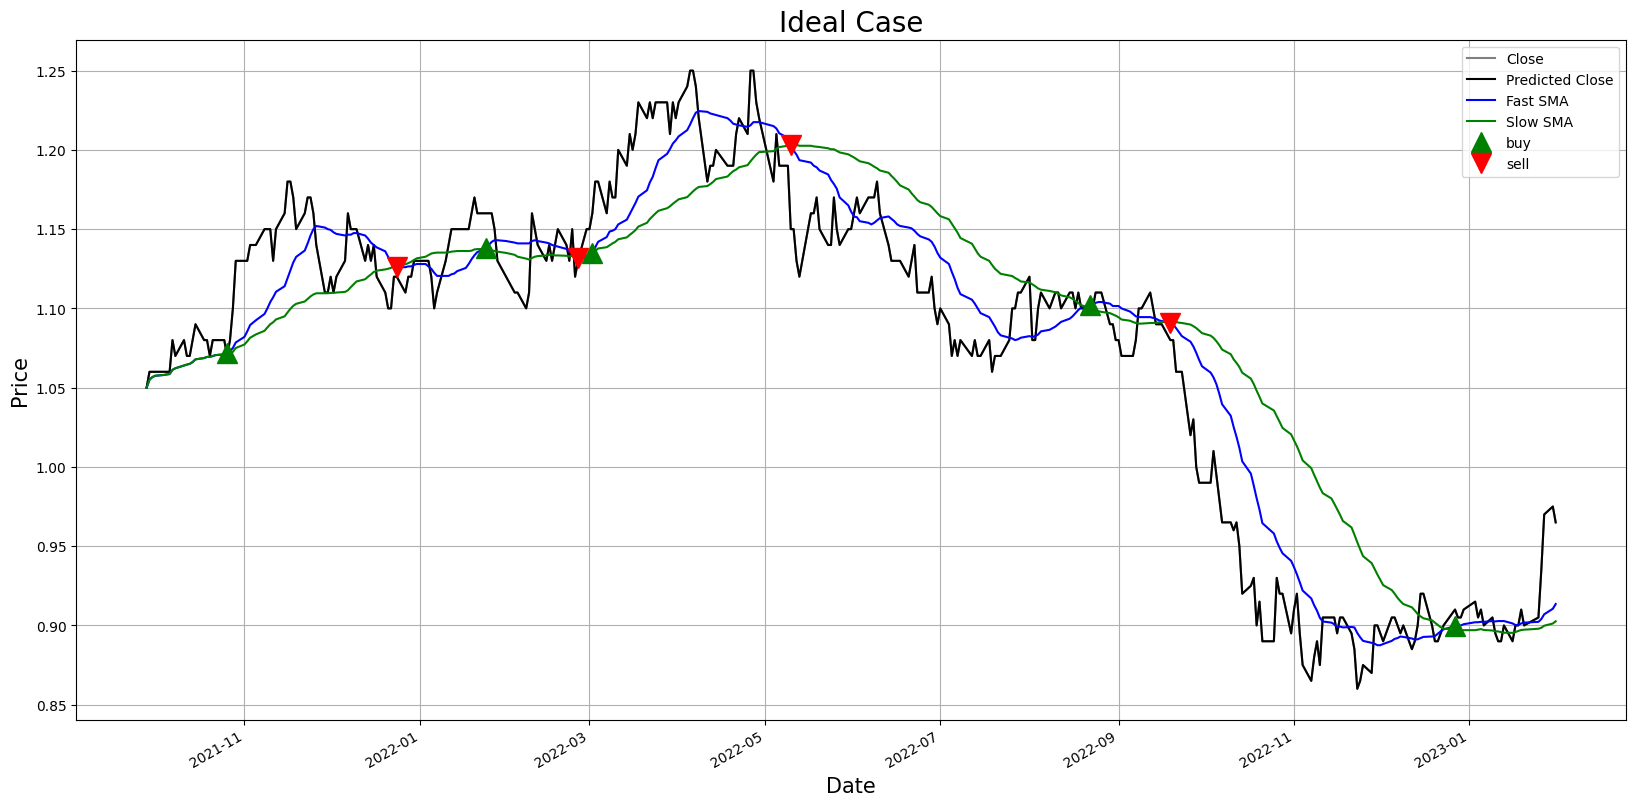

In [6]:
# computing the returns based on the ideal case (when we know today's price)
ideal_df = compute_tradeSignal_portfolioReturn(test_df, title = "Ideal Case")
ideal_df = ideal_df[ideal_df.index[seq_length]:]

## Random Walk

Taking yesterday's price as today's price

RMSE: 0.0142015
0.0


<ipython-input-5-5eb510c56194>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'].iloc[0]=0


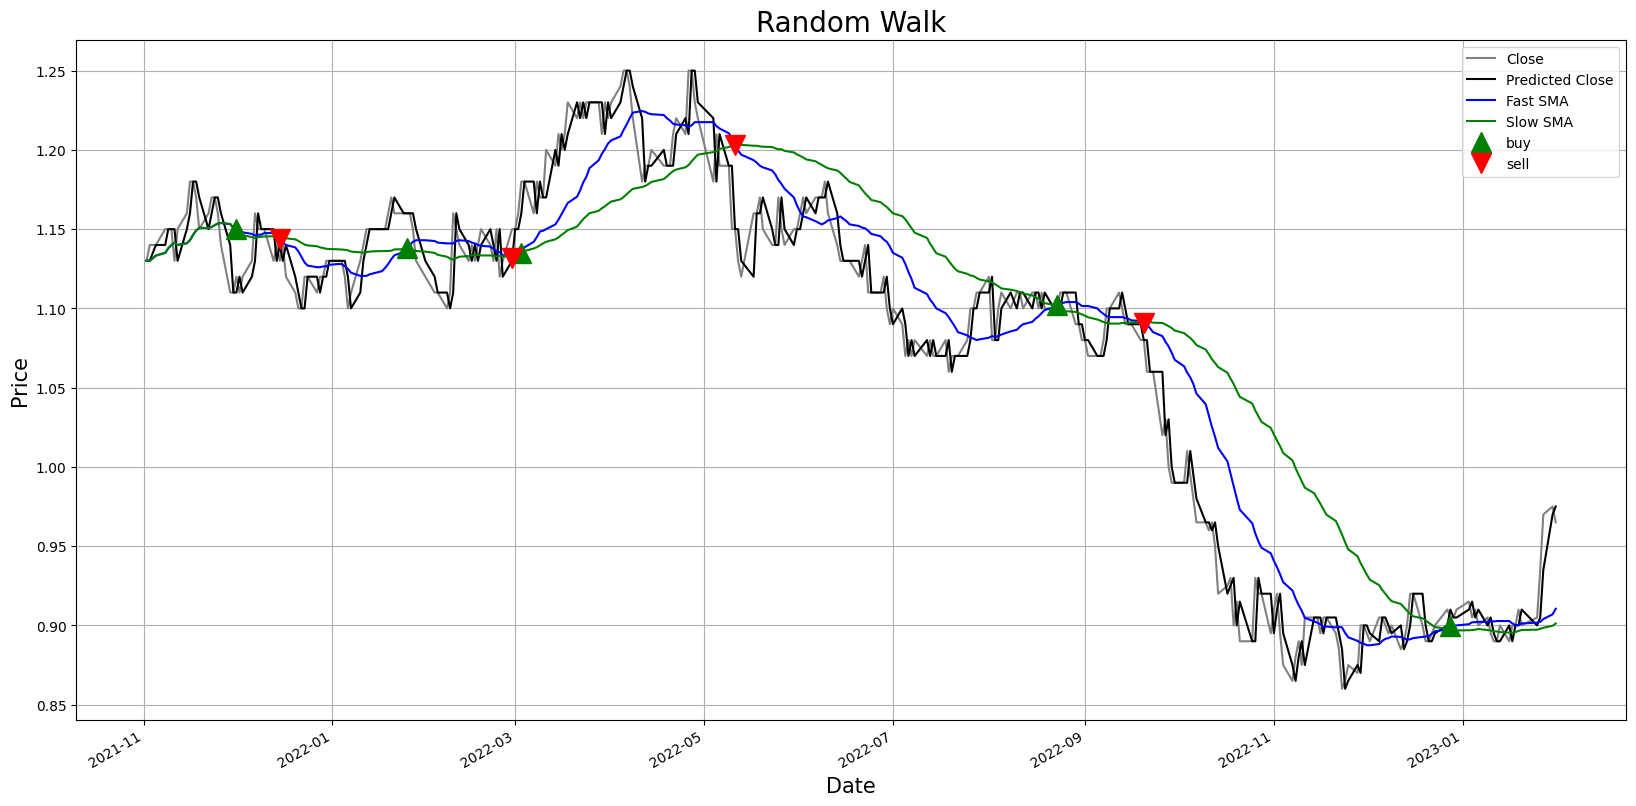

In [7]:
rw_df = df.copy(deep = True)
rw_df["Close_pred"] = rw_df["Close"].shift(1, axis = 0)
rw_df = rw_df.loc[test_df.index[0 + seq_length]:test_df.index[-1]]
print("RMSE: %0.7f" % np.sqrt(mean_squared_error(rw_df["Close"], rw_df["Close_pred"])) )
rw_df = compute_tradeSignal_portfolioReturn(rw_df, title = "Random Walk", pred_col = "Close_pred")
rw_df = rw_df[rw_df.index[seq_length]:]

## Benchmark - LSTM

For benchmarking a simple LSTM with just 1 hidden layer is used. The LSTM has been trained on the original, normalised and stationary data to compare the effect of pre-processing on the stock price prediction

In [8]:
# defining the hyperparameters
epochs = 50
batch_size = 100
val_split = 0.2

In [9]:
# Normalize the data (scaling between 0 and 1)
scaler = MinMaxScaler()
train_val_df['Close_normal'] = scaler.fit_transform(train_val_df[['Close']])
test_df['Close_normal'] = scaler.fit_transform(test_df[['Close']])

In [10]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i + seq_length].values)
        y.append(data.iloc[i + seq_length])
    return np.array(X), np.array(y)

# creating the sequences that will be fed into the LSTM
X_train, y_train = create_sequences(train_val_df['Close'], seq_length)
X_test, y_test = create_sequences(test_df['Close'], seq_length)

X_nor_train, y_nor_train = create_sequences(train_val_df['Close_normal'], seq_length)
X_nor_test, y_nor_test = create_sequences(test_df['Close_normal'], seq_length)

X_stat_train, y_stat_train = create_sequences(train_val_df['Close_stat'], seq_length)
X_stat_test, y_stat_test = create_sequences(test_df['Close_stat'], seq_length)

In [11]:
tf.debugging.disable_traceback_filtering()

### Trained on original data

In [12]:
#Defining the model
model = keras.Sequential()
model.add(layers.LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(layers.Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])
# training the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split = val_split )


Epoch 1/50
25/25 [==============================] - 8s 43ms/step - loss: 0.4464 - root_mean_squared_error: 0.6681 - val_loss: 0.0170 - val_root_mean_squared_error: 0.1302
Epoch 2/50
25/25 [==============================] - 0s 13ms/step - loss: 0.0096 - root_mean_squared_error: 0.0978 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0631
Epoch 3/50
25/25 [==============================] - 0s 12ms/step - loss: 0.0042 - root_mean_squared_error: 0.0649 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0489
Epoch 4/50
25/25 [==============================] - 0s 12ms/step - loss: 0.0030 - root_mean_squared_error: 0.0546 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0476
Epoch 5/50
25/25 [==============================] - 0s 15ms/step - loss: 0.0026 - root_mean_squared_error: 0.0512 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0458
Epoch 6/50
25/25 [==============================] - 0s 15ms/step - loss: 0.0023 - root_mean_squared_error: 0.0478 - val_loss: 0.0019 - val_root_m

#### Tested on Original Data

94/94 [==============================] - 1s 7ms/step - loss: 6.8137e-04 - root_mean_squared_error: 0.0261
Train MSE: 0.000681
Train RMSE: 0.026103
10/10 [==============================] - 1s 4ms/step
Test MSE: 0.000617
Test RMSE: 0.024835
0.0


<ipython-input-5-5eb510c56194>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'].iloc[0]=0


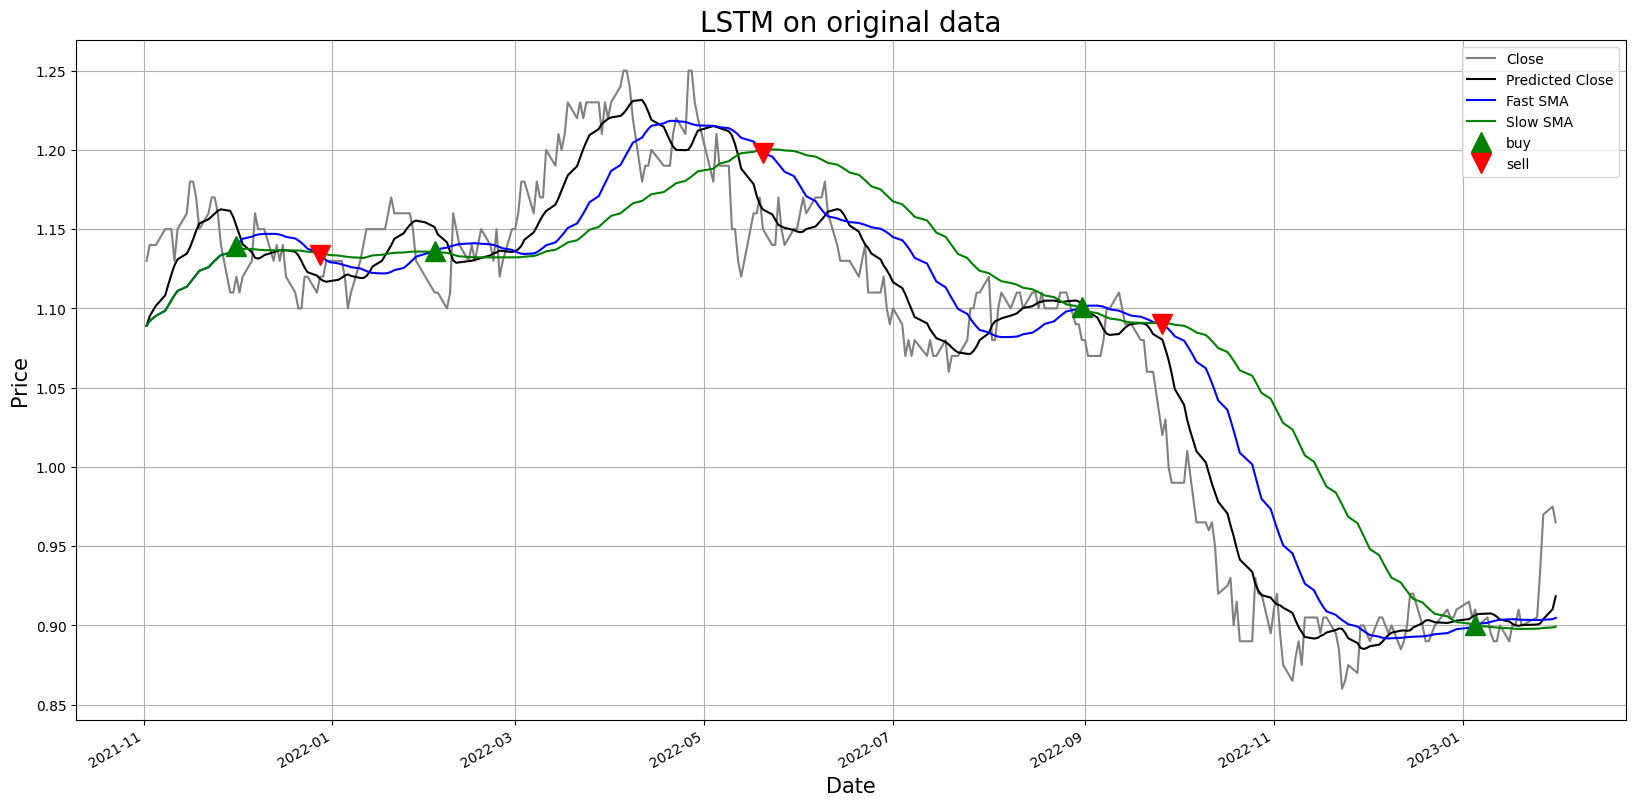

In [13]:
train_loss, train_rmse = model.evaluate(X_train, y_train)
print("Train MSE: %.6f" %  train_loss)
print("Train RMSE: %.6f" % train_rmse )
# testing the model and calculating the returns based on its prediction
predicted_LSTM = model.predict(X_test)
Test_loss = mean_squared_error(test_df['Close'][seq_length:], predicted_LSTM)
Test_rmse = np.sqrt(Test_loss)
print("Test MSE: %.6f" % Test_loss)
print("Test RMSE: %.6f" % Test_rmse )
lstm_df = pd.DataFrame()
lstm_df["Close"] = test_df["Close"][seq_length:]
lstm_df["Close_pred"] = predicted_LSTM
lstm_df = compute_tradeSignal_portfolioReturn(lstm_df, title = "LSTM on original data", pred_col = "Close_pred")


### Trained on Normalised Data

In [14]:
# defining the model
model_nor = keras.Sequential()
model_nor.add(layers.LSTM(50, input_shape=(X_nor_train.shape[1], 1)))
model_nor.add(layers.Dense(1))

model_nor.compile(optimizer='adam', loss='mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])
# training the model
model_nor.fit(X_nor_train, y_nor_train, epochs=epochs, batch_size=batch_size, validation_split = val_split)


Epoch 1/50
25/25 [==============================] - 4s 24ms/step - loss: 0.0630 - root_mean_squared_error: 0.2509 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0611
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0043 - root_mean_squared_error: 0.0653 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0583
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.0023 - root_mean_squared_error: 0.0475 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0499
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0016 - root_mean_squared_error: 0.0400 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0482
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0013 - root_mean_squared_error: 0.0363 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0478
Epoch 6/50
25/25 [==============================] - 0s 7ms/step - loss: 0.0012 - root_mean_squared_error: 0.0350 - val_loss: 0.0023 - val_root_mean_s

#### Tested on Normalised Data

94/94 [==============================] - 0s 4ms/step - loss: 6.8764e-04 - root_mean_squared_error: 0.0262
Normalised Train MSE: 0.000688
Normalised Train RMSE: 0.026223
10/10 [==============================] - 0s 3ms/step
Normalised Test MSE: 0.000423
Normalised Test RMSE: 0.020557
0.0


<ipython-input-5-5eb510c56194>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'].iloc[0]=0


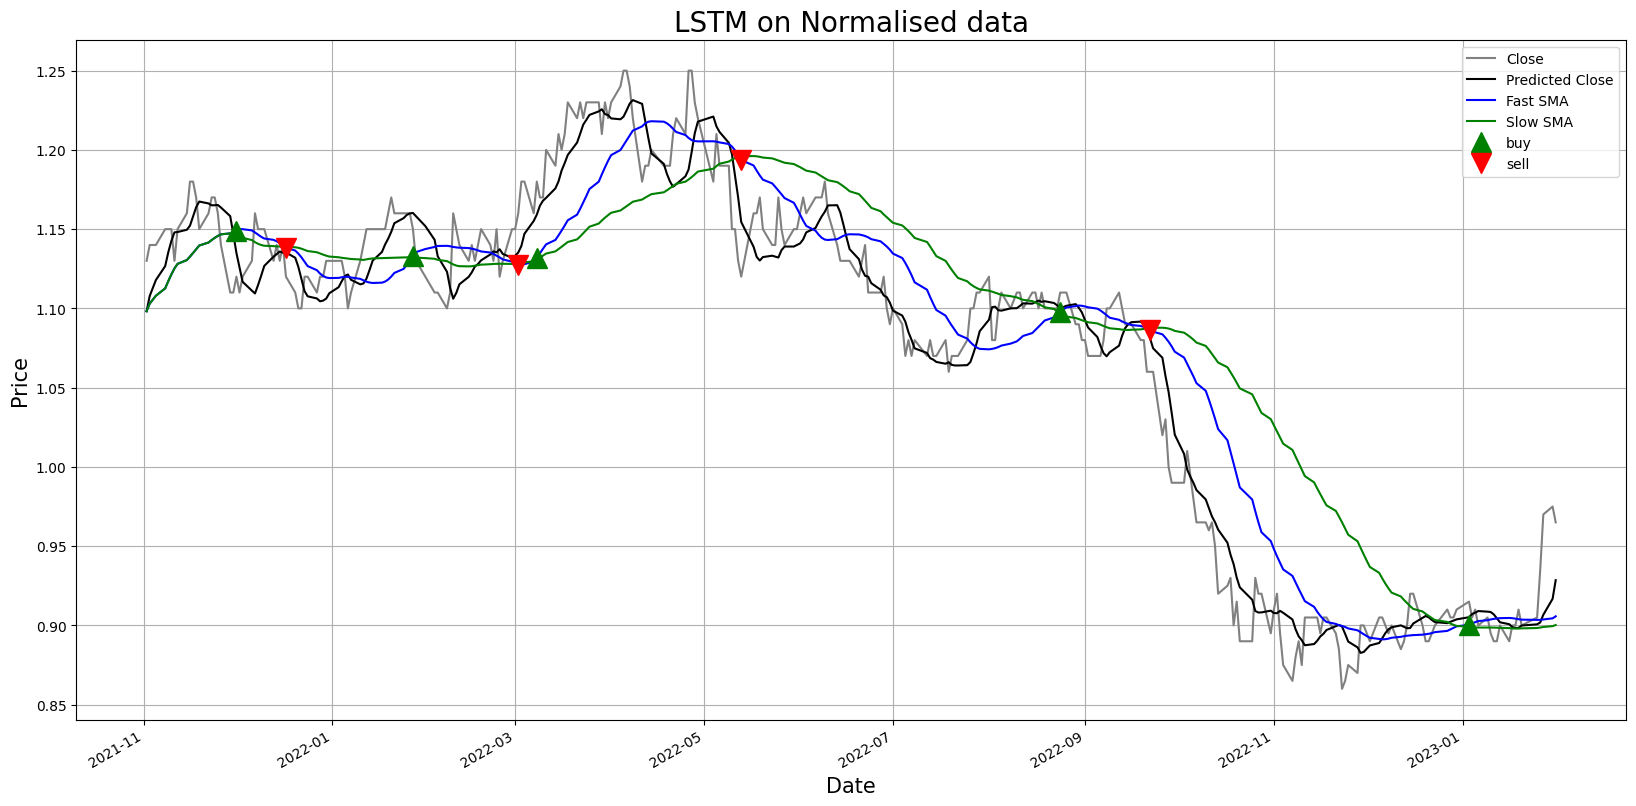

In [15]:
train_nor_loss, train_nor_rmse = model_nor.evaluate(X_nor_train, y_nor_train)
print("Normalised Train MSE: %.6f" % train_nor_loss)
print("Normalised Train RMSE: %.6f"% train_nor_rmse )
# testing the model and calculating its return
# getting the prediction
predicted_nor_LSTM = model_nor.predict(X_nor_test)
# transforming the predictions back to the closing price range
predicted_nor_LSTM = scaler.inverse_transform(predicted_nor_LSTM)
test_nor_loss = mean_squared_error(test_df['Close'][seq_length:], predicted_nor_LSTM)
test_nor_rmse = np.sqrt(test_nor_loss)
print("Normalised Test MSE: %.6f" % test_nor_loss)
print("Normalised Test RMSE: %.6f" % test_nor_rmse)
# computing and storing the returns
lstm_norm_df = pd.DataFrame()
lstm_norm_df["Close"] = test_df["Close"][seq_length:]
lstm_norm_df["Close_pred"] = predicted_nor_LSTM
lstm_norm_df = compute_tradeSignal_portfolioReturn(lstm_norm_df, title = "LSTM on Normalised data", pred_col = "Close_pred")


### Trained on Stationary Data

In [16]:
#defining the model
model_stat = keras.Sequential()
model_stat.add(layers.LSTM(50, input_shape=(X_stat_train.shape[1], 1)))
model_stat.add(layers.Dense(1))

model_stat.compile(optimizer='adam', loss='mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])
# training the model
model_nor.fit(X_stat_train, y_stat_train, epochs=epochs, batch_size=batch_size, validation_split = val_split)


Epoch 1/50
25/25 [==============================] - 0s 8ms/step - loss: 2.0670e-04 - root_mean_squared_error: 0.0144 - val_loss: 3.6209e-04 - val_root_mean_squared_error: 0.0190
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 1.8619e-04 - root_mean_squared_error: 0.0136 - val_loss: 3.5374e-04 - val_root_mean_squared_error: 0.0188
Epoch 3/50
25/25 [==============================] - 0s 7ms/step - loss: 1.8221e-04 - root_mean_squared_error: 0.0135 - val_loss: 3.5430e-04 - val_root_mean_squared_error: 0.0188
Epoch 4/50
25/25 [==============================] - 0s 7ms/step - loss: 1.8396e-04 - root_mean_squared_error: 0.0136 - val_loss: 3.5355e-04 - val_root_mean_squared_error: 0.0188
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 1.8189e-04 - root_mean_squared_error: 0.0135 - val_loss: 3.5329e-04 - val_root_mean_squared_error: 0.0188
Epoch 6/50
25/25 [==============================] - 0s 7ms/step - loss: 1.8232e-04 - root_mean_squared_error: 

####Tested on Stationary Data

94/94 [==============================] - 1s 4ms/step - loss: 1.9641e-04 - root_mean_squared_error: 0.0140
Stationary Train MSE 0.000196
Stationary Train RMSE: 0.014015
10/10 [==============================] - 0s 3ms/step
Stationary Test MSE: 0.017366
Stationary Test RMSE: 0.131780
0.0


<ipython-input-5-5eb510c56194>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'].iloc[0]=0


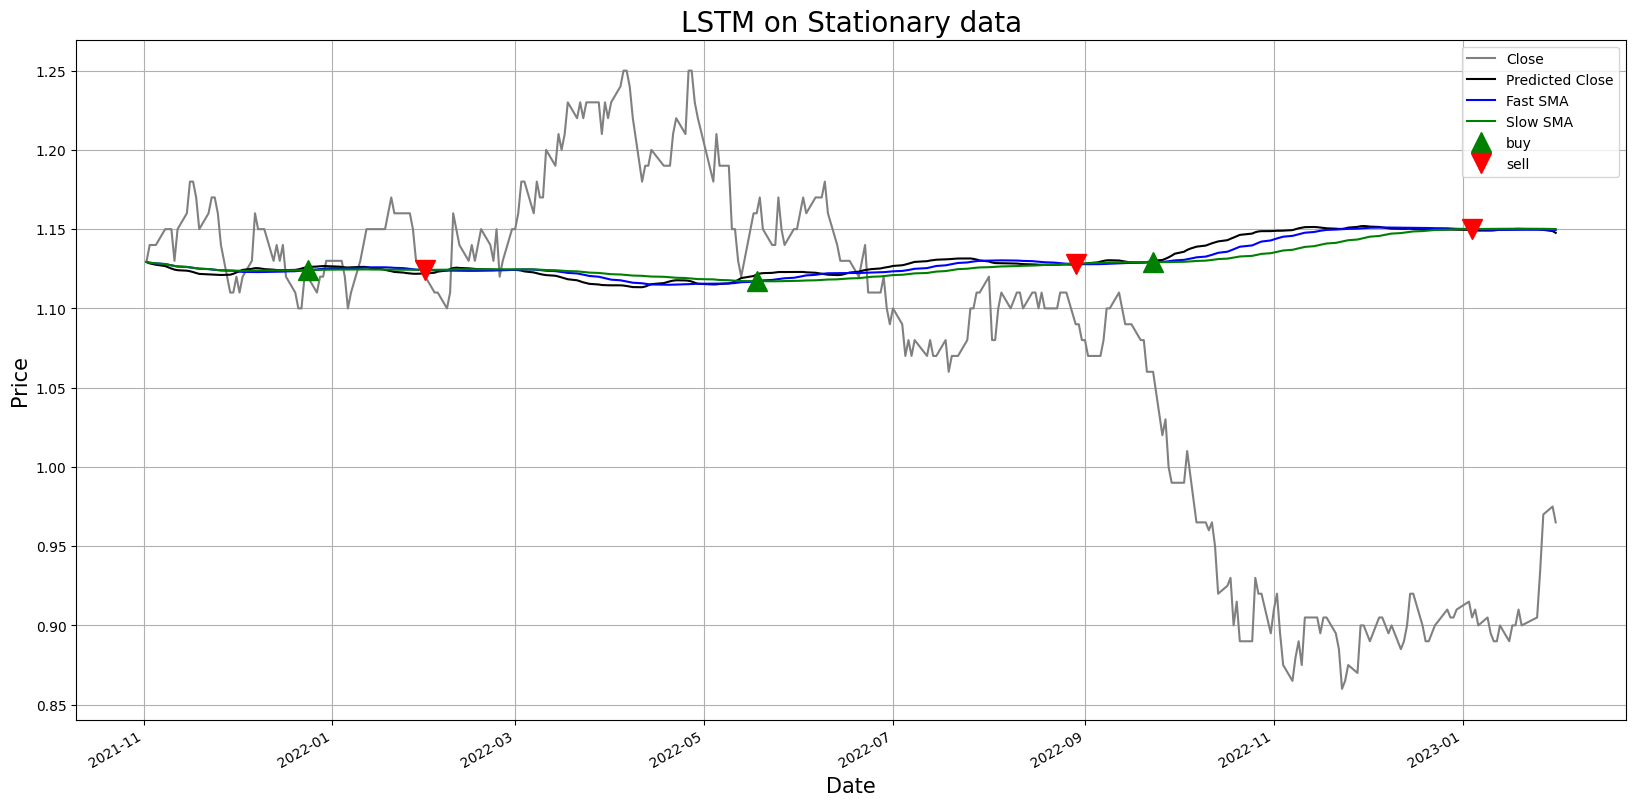

In [17]:
train_stat_loss, train_stat_rmse = model_stat.evaluate(X_stat_train, y_stat_train)
print("Stationary Train MSE %.6f" % train_stat_loss)
print("Stationary Train RMSE: %.6f" % train_stat_rmse )
# testing on the test data
predicted_stat_LSTM = model_stat.predict(X_stat_test)
# undoing the stationary transformation
predicted_stat_LSTM = undo_stat(predicted_stat_LSTM, test_df['Close'][seq_length-1])
test_stat_loss = mean_squared_error(test_df['Close'][seq_length:], predicted_stat_LSTM)
test_stat_rmse = np.sqrt(test_stat_loss)
print("Stationary Test MSE: %.6f" % test_stat_loss)
print("Stationary Test RMSE: %.6f"% test_stat_rmse)
# storing the prediction and calculating the returns
lstm_stat_df = pd.DataFrame()
lstm_stat_df["Close"] = test_df["Close"][seq_length:]
lstm_stat_df["Close_pred"] = predicted_stat_LSTM
lstm_stat_df = compute_tradeSignal_portfolioReturn(lstm_stat_df, title = "LSTM on Stationary data", pred_col = "Close_pred")


## FCM - LSTM

In [18]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i + seq_length].values)
        y.append(data.iloc[i + seq_length, 0])
    return np.array(X), np.array(y)


In [19]:
# Initializing LSTM parameters
epochs = 50
batch_size = 20
train_size = int((1-val_split)*len(train_val_df))

### Trained on original data

In [20]:
# initializing the variables to store the model with the minimum RMSE
# Will store the minimum RMSE
min_rmse = 100
# will store the number of clusters with the minimum values
min_rmse_ncluster = 0
for n_clusters in range(2, 10):

    # Perform fuzzification of the Closing prices using FCM
  cntr, u_train, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
      train_val_df[:train_size]["Close"].values.reshape(1, -1), n_clusters, m=7, error=0.001, maxiter=1000, init=None)
  cntr, u_val, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
      train_val_df[train_size:]["Close"].values.reshape(1, -1), n_clusters, m=7, error=0.001, maxiter=1000, init=None)

  # Extract the fuzzified data and add the Closing price to create the input for the LSTM
  # The fuzzified_data contains the fuzzified data, where each data point is represented as a set of membership degrees across clusters.

  fuzzified_train_data = np.column_stack((train_val_df[:train_size]["Close"].values, u_train.T))  # Transpose the membership matrix
  fuzzified_val_data = np.column_stack((train_val_df[train_size:]["Close"].values, u_val.T))  # Transpose the membership matrix


  #convert the numpy arrays into dataframes so that they can sent as a parameter to the create_sequences function
  fuzzified_train_df = pd.DataFrame(fuzzified_train_data)
  fuzzified_val_df = pd.DataFrame(fuzzified_val_data)

  # create the sequences of the length seq_length and used as the input for the LSTM model
  X_train_fcm, y_train_fcm = create_sequences(fuzzified_train_df, seq_length)
  X_val_fcm, y_val_fcm = create_sequences(fuzzified_val_df, seq_length)

  # Define the LSTM model
  model_fuzzy = keras.Sequential()
  model_fuzzy.add(layers.LSTM(128, return_sequences=True, input_shape=(X_train_fcm.shape[1], X_train_fcm.shape[2])))
  model_fuzzy.add(layers.LSTM(64, return_sequences=False))
  model_fuzzy.add(layers.Dense(25))
  model_fuzzy.add(layers.Dense(1))

  model_fuzzy.compile(optimizer='adam', loss='mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])

  # Training the LSTM model on the training data and checking its performance on the validation data
  model_fuzzy.fit(X_train_fcm, y_train_fcm, epochs=epochs, batch_size=batch_size, verbose = 0,  validation_data = (X_val_fcm, y_val_fcm))
  # Getting the Validation data prediction
  predicted_fuzzy_LSTM = model_fuzzy.predict(X_val_fcm)
  # Calculating the MSE and RMSE on the Validation data
  # Note the prediction starts from the seq_length +1 input because we need seq_length values to predict the closing price
  val_fuzzy_loss = mean_squared_error(train_val_df["Close"][train_size+seq_length:], predicted_fuzzy_LSTM)
  val_fuzzy_rmse = np.sqrt(val_fuzzy_loss)
  # Choosing and storing the model with the least RMSE. The testing data will be used on this model
  if min_rmse > val_fuzzy_rmse:
    min_rmse = val_fuzzy_rmse
    min_rmse_ncluster = n_clusters
    final_model = model_fuzzy
  print("Number of Clusters: ", n_clusters)
  print("Validation MSE: ", val_fuzzy_loss)
  print("Validation RMSE: ", val_fuzzy_rmse )

print("Number of clusters with minimum RMSE: ", min_rmse_ncluster)


19/19 [==============================] - 1s 3ms/step
Number of Clusters:  2
Validation MSE:  0.00034681487145780813
Validation RMSE:  0.018622966236821893
19/19 [==============================] - 1s 3ms/step
Number of Clusters:  3
Validation MSE:  0.0006554724398469333
Validation RMSE:  0.0256021959965729
19/19 [==============================] - 1s 7ms/step
Number of Clusters:  4
Validation MSE:  0.0006092933055974287
Validation RMSE:  0.024683867314451127
19/19 [==============================] - 1s 3ms/step
Number of Clusters:  5
Validation MSE:  0.00039391502684159416
Validation RMSE:  0.01984729268292263
19/19 [==============================] - 1s 5ms/step
Number of Clusters:  6
Validation MSE:  0.00038383843240545823
Validation RMSE:  0.01959179502765018
19/19 [==============================] - 1s 3ms/step
Number of Clusters:  7
Validation MSE:  0.0003905872144851225
Validation RMSE:  0.019763279446618227
19/19 [==============================] - 1s 3ms/step
Number of Clusters:  8
V

#### Testing on original data

10/10 [==============================] - 0s 4ms/step
Number of Clusters:  2
Test MSE: 0.000221
Test RMSE: 0.014873
0.0


<ipython-input-5-5eb510c56194>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'].iloc[0]=0


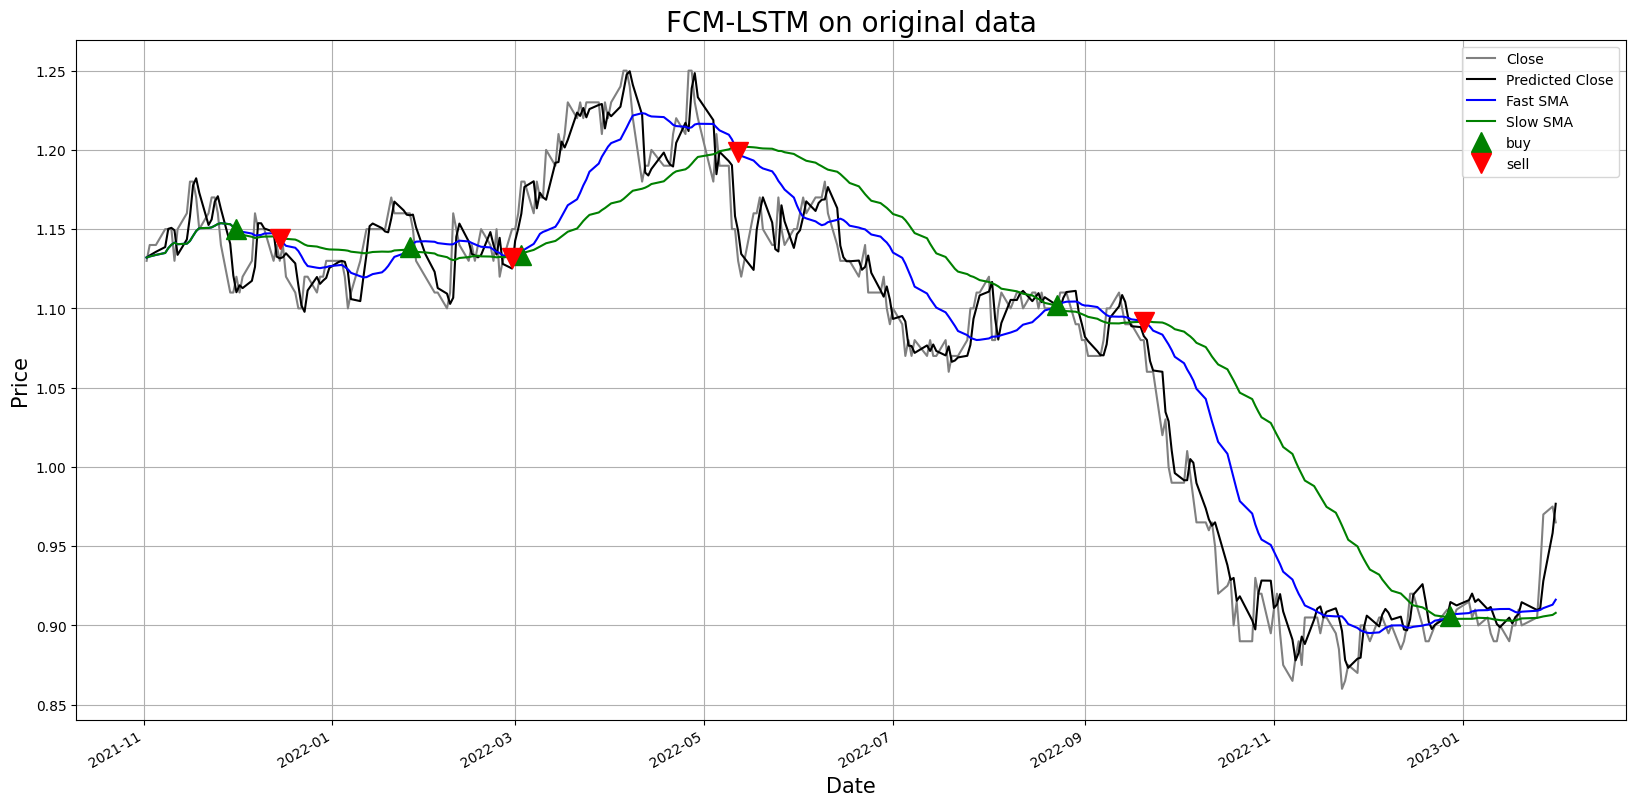

In [21]:
cntr, u_test, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
      test_df["Close"].values.reshape(1, -1), min_rmse_ncluster, m=7, error=0.0001, maxiter=1000, init=None)
 # Extract the fuzzified data and add the Closing price to create the input for the LSTM
# The fuzzified_data contains the fuzzified data, where each data point is represented as a set of membership degrees across clusters.
fuzzified_test_data = np.column_stack((test_df["Close"].values, u_test.T))
X_test_fcm, y_test_fcm = create_sequences(pd.DataFrame(fuzzified_test_data), seq_length)
predicted_fuzzy_LSTM = final_model.predict(X_test_fcm)
test_fuzzy_loss = mean_squared_error(test_df["Close"][seq_length:], predicted_fuzzy_LSTM)
test_fuzzy_rmse = np.sqrt(test_fuzzy_loss)
print("Number of Clusters: ", min_rmse_ncluster)
print("Test MSE: %.6f" % test_fuzzy_loss)
print("Test RMSE: %.6f" % test_fuzzy_rmse )
fcm_lstm_df = pd.DataFrame()
fcm_lstm_df["Close"] = test_df["Close"][seq_length:]
fcm_lstm_df["Close_pred"] = predicted_fuzzy_LSTM
fcm_lstm_df = compute_tradeSignal_portfolioReturn(fcm_lstm_df, title = "FCM-LSTM on original data", pred_col = "Close_pred")


### Trained on Normalised data

In [22]:
# initializing the variables to store the model with the minimum RMSE
# Will store the minimum RMSE
min_rmse = 100
# will store the number of clusters with the minimum values
min_rmse_ncluster = 0
for n_clusters in range(2, 10):

    # Perform fuzzification of the Closing prices using FCM
  cntr, u_train, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
      train_val_df[:train_size]["Close"].values.reshape(1, -1), n_clusters, m=7, error=0.001, maxiter=1000, init=None)
  cntr, u_val, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
      train_val_df[train_size:]["Close"].values.reshape(1, -1), n_clusters, m=7, error=0.001, maxiter=1000, init=None)

  # Extract the fuzzified data and add the Closing price to create the input for the LSTM
  # The fuzzified_data contains the fuzzified data, where each data point is represented as a set of membership degrees across clusters.

  fuzzified_train_data = np.column_stack((train_val_df[:train_size]["Close"].values, u_train.T))  # Transpose the membership matrix
  fuzzified_val_data = np.column_stack((train_val_df[train_size:]["Close"].values, u_val.T))  # Transpose the membership matrix

  # Normalize the fuzzified data to have values between 0 and 1 for each data point
  fuzzified_train_data = scaler.fit_transform(fuzzified_train_data)
  # Normalize the fuzzified data to have values between 0 and 1 for each data point
  fuzzified_val_data = scaler.fit_transform(fuzzified_val_data)

  #convert the numpy arrays into dataframes so that they can sent as a parameter to the create_sequences function
  fuzzified_train_df = pd.DataFrame(fuzzified_train_data)
  fuzzified_val_df = pd.DataFrame(fuzzified_val_data)

  # create the sequences of the length seq_length and used as the input for the LSTM model
  X_train_fcm, y_train_fcm = create_sequences(fuzzified_train_df, seq_length)
  X_val_fcm, y_val_fcm = create_sequences(fuzzified_val_df, seq_length)

  # Define the LSTM model
  model_fuzzy = keras.Sequential()
  model_fuzzy.add(layers.LSTM(128, return_sequences=True, input_shape=(X_train_fcm.shape[1], X_train_fcm.shape[2])))
  model_fuzzy.add(layers.LSTM(64, return_sequences=False))
  model_fuzzy.add(layers.Dense(25))
  model_fuzzy.add(layers.Dense(1))

  model_fuzzy.compile(optimizer='adam', loss='mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])

  # Training the LSTM model on the training data and checking its performance on the validation data
  model_fuzzy.fit(X_train_fcm, y_train_fcm, epochs=epochs, batch_size=batch_size, verbose = 0,  validation_data = (X_val_fcm, y_val_fcm))
  # Getting the Validation data prediction
  predicted_fuzzy_LSTM = model_fuzzy.predict(X_val_fcm)
  # Getting the Closing price prediction in the original price range
  predicted_fuzzy_LSTM = scaler.inverse_transform(np.concatenate([predicted_fuzzy_LSTM,X_val_fcm[:, -1, 1:]], axis=1))[:, 0]
  # Calculating the MSE and RMSE on the Validation data
  # Note the prediction starts from the seq_length +1 input because we need seq_length values to predict the closing price
  val_fuzzy_loss = mean_squared_error(train_val_df["Close"][train_size+seq_length:], predicted_fuzzy_LSTM)
  val_fuzzy_rmse = np.sqrt(val_fuzzy_loss)
  # Choosing and storing the model with the least RMSE. The testing data will be used on this model
  if min_rmse > val_fuzzy_rmse:
    min_rmse = val_fuzzy_rmse
    min_rmse_ncluster = n_clusters
    final_nor_model = model_fuzzy
  print("Number of Clusters: ", n_clusters)
  print("Validation MSE: ", val_fuzzy_loss)
  print("Validation RMSE: ", val_fuzzy_rmse )

print("Number of clusters with minimum RMSE: ", min_rmse_ncluster)


19/19 [==============================] - 1s 3ms/step
Number of Clusters:  2
Validation MSE:  0.0003295153825531831
Validation RMSE:  0.018152558567683594
19/19 [==============================] - 1s 3ms/step
Number of Clusters:  3
Validation MSE:  0.0003405745651259803
Validation RMSE:  0.018454662422433533
19/19 [==============================] - 1s 4ms/step
Number of Clusters:  4
Validation MSE:  0.00032963234495608177
Validation RMSE:  0.01815577993246453
19/19 [==============================] - 1s 3ms/step
Number of Clusters:  5
Validation MSE:  0.0003380279155600789
Validation RMSE:  0.01838553549832256
19/19 [==============================] - 1s 4ms/step
Number of Clusters:  6
Validation MSE:  0.00039220228450112554
Validation RMSE:  0.01980409766945027
19/19 [==============================] - 1s 5ms/step
Number of Clusters:  7
Validation MSE:  0.00034203130833529135
Validation RMSE:  0.018494088469975786
19/19 [==============================] - 1s 3ms/step
Number of Clusters:  8


#### Testing on Normalised Data

10/10 [==============================] - 0s 4ms/step
Number of Clusters:  2
Test MSE: 0.000243
Test RMSE: 0.015594
0.0


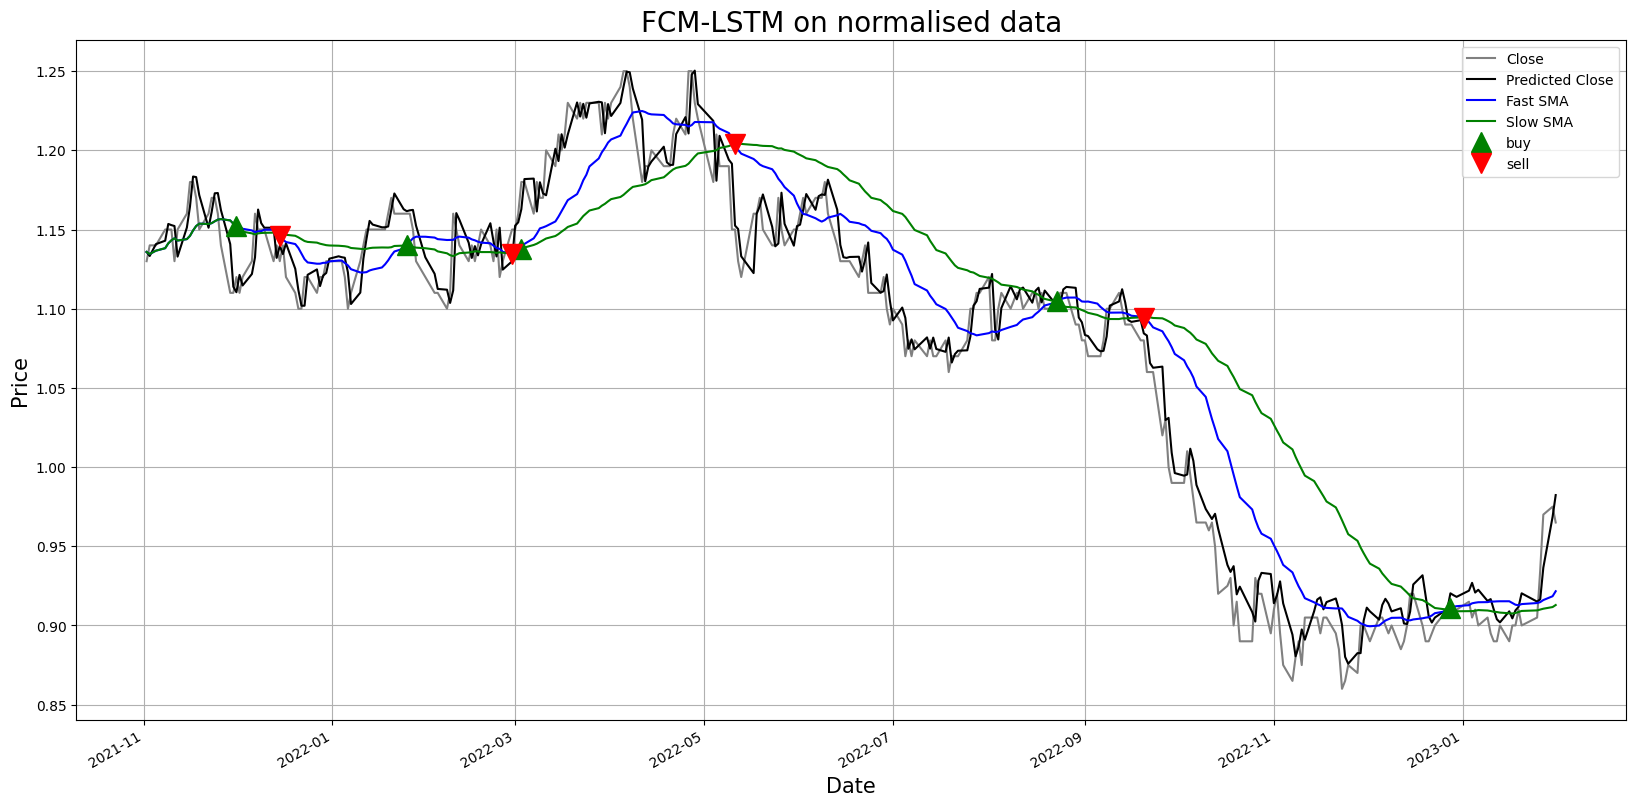

In [23]:
# Use FCM to create the fuzzified data where the number of clusters is the number of clusters with the minimum RMSE for the validation dataset
cntr, u_test, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
      test_df["Close"].values.reshape(1, -1), min_rmse_ncluster, m=7, error=0.0001, maxiter=1000, init=None)
 # Extract the fuzzified data and add the Closing price to create the input for the LSTM
# The fuzzified_data contains the fuzzified data, where each data point is represented as a set of membership degrees across clusters.
fuzzified_test_data = np.column_stack((test_df["Close"].values, u_test.T))
# Normalize the fuzzified data to have values between 0 and 1 for each data point
fuzzified_test_data = scaler.fit_transform(fuzzified_test_data)
# Creating the sequences to input to the trained LSTM model
X_test_fcm, y_test_fcm = create_sequences(pd.DataFrame(fuzzified_test_data), seq_length)
# Getting the test data predictions
predicted_fuzzy_LSTM = final_nor_model.predict(X_test_fcm)
# Converting the predictions in to the original price scale
predicted_fuzzy_LSTM = scaler.inverse_transform(np.concatenate([predicted_fuzzy_LSTM,X_test_fcm[:, -1, :-1]], axis=1))[:, 0]
# Calculating the MSE and RMSE
test_fuzzy_loss = mean_squared_error(test_df["Close"][seq_length:], predicted_fuzzy_LSTM)
test_fuzzy_rmse = np.sqrt(test_fuzzy_loss)
print("Number of Clusters: ", min_rmse_ncluster)
print("Test MSE: %.6f" % test_fuzzy_loss)
print("Test RMSE: %.6f" % test_fuzzy_rmse )
# Saving the predictions and calculating the returns
fcm_lstm_nor_df = pd.DataFrame()
fcm_lstm_nor_df["Close"] = test_df["Close"][seq_length:]
fcm_lstm_nor_df["Close_pred"] = predicted_fuzzy_LSTM
fcm_lstm_nor_df = compute_tradeSignal_portfolioReturn(fcm_lstm_nor_df, title = "FCM-LSTM on normalised data", pred_col = "Close_pred")


###Trained on Stationary Data

In [24]:
# initializing the variables to store the model with the minimum RMSE
# Will store the minimum RMSE
min_rmse = 10000
# will store the number of clusters with the minimum values
min_rmse_ncluster = 0
for n_clusters in range(2, 10):

    # Perform fuzzification of the Closing prices using FCM
  cntr, u_train, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
      train_val_df[:train_size]["Close"].values.reshape(1, -1), n_clusters, m=7, error=0.001, maxiter=1000, init=None)
  cntr, u_val, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
      train_val_df[train_size:]["Close"].values.reshape(1, -1), n_clusters, m=7, error=0.001, maxiter=1000, init=None)

  # Extract the fuzzified data and add the Closing Stationary price to create the input for the LSTM
  # The fuzzified_data contains the fuzzified data, where each data point is represented as a set of membership degrees across clusters.

  fuzzified_train_data = np.column_stack((train_val_df[:train_size]["Close_stat"].values, u_train.T))  # Transpose the membership matrix
  fuzzified_val_data = np.column_stack((train_val_df[train_size:]["Close_stat"].values, u_val.T))  # Transpose the membership matrix

  # Normalize the fuzzified data to have values between 0 and 1 for each data point
  fuzzified_train_data = scaler.fit_transform(fuzzified_train_data)
  # Normalize the fuzzified data to have values between 0 and 1 for each data point
  fuzzified_val_data = scaler.fit_transform(fuzzified_val_data)

  #convert the numpy arrays into dataframes so that they can sent as a parameter to the create_sequences function
  fuzzified_train_df = pd.DataFrame(fuzzified_train_data)
  fuzzified_val_df = pd.DataFrame(fuzzified_val_data)

  # create the sequences of the length seq_length and used as the input for the LSTM model
  X_train_fcm, y_train_fcm = create_sequences(fuzzified_train_df, seq_length)
  X_val_fcm, y_val_fcm = create_sequences(fuzzified_val_df, seq_length)

  # Define the LSTM model
  model_fuzzy = keras.Sequential()
  model_fuzzy.add(layers.LSTM(128, return_sequences=True, input_shape=(X_train_fcm.shape[1], X_train_fcm.shape[2])))
  model_fuzzy.add(layers.LSTM(64, return_sequences=False))
  model_fuzzy.add(layers.Dense(25))
  model_fuzzy.add(layers.Dense(1))

  model_fuzzy.compile(optimizer='adam', loss='mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])

  # Training the LSTM model on the training data and checking its performance on the validation data
  model_fuzzy.fit(X_train_fcm, y_train_fcm, epochs=epochs, batch_size=batch_size, verbose = 0,  validation_data = (X_val_fcm, y_val_fcm))
  # Getting the Validation data prediction
  predicted_fuzzy_LSTM = model_fuzzy.predict(X_val_fcm)
  # Getting the Closing price prediction in the original price range
  predicted_fuzzy_LSTM = undo_stat(predicted_fuzzy_LSTM, train_val_df["Close"][train_size+seq_length-1])
  # Calculating the MSE and RMSE on the Validation data
  # Note the prediction starts from the seq_length +1 input because we need seq_length values to predict the closing price
  val_fuzzy_loss = mean_squared_error(train_val_df["Close"][train_size+seq_length:], predicted_fuzzy_LSTM)
  val_fuzzy_rmse = np.sqrt(val_fuzzy_loss)
  # Choosing and storing the model with the least RMSE. The testing data will be used on this model
  if min_rmse > val_fuzzy_rmse:
    min_rmse = val_fuzzy_rmse
    min_rmse_ncluster = n_clusters
    final_stat_model = model_fuzzy
  print("Number of Clusters: ", n_clusters)
  print("Validation MSE: ", val_fuzzy_loss)
  print("Validation RMSE: ", val_fuzzy_rmse )

print("Number of clusters with minimum RMSE: ", min_rmse_ncluster)




19/19 [==============================] - 1s 4ms/step
Number of Clusters:  2
Validation MSE:  31445.805105137475
Validation RMSE:  177.3296509474303
19/19 [==============================] - 1s 3ms/step
Number of Clusters:  3
Validation MSE:  29451.463975560036
Validation RMSE:  171.6142883782118
19/19 [==============================] - 1s 4ms/step
Number of Clusters:  4
Validation MSE:  31149.449126522257
Validation RMSE:  176.49206533587355
19/19 [==============================] - 1s 4ms/step
Number of Clusters:  5
Validation MSE:  32493.525278281817
Validation RMSE:  180.25960523168195
19/19 [==============================] - 1s 4ms/step
Number of Clusters:  6
Validation MSE:  30186.599939087217
Validation RMSE:  173.74291334925638
19/19 [==============================] - 1s 4ms/step
Number of Clusters:  7
Validation MSE:  31438.943834499532
Validation RMSE:  177.31030380240043
19/19 [==============================] - 1s 4ms/step
Number of Clusters:  8
Validation MSE:  31721.852685180

#### Testing on Stationary Data

10/10 [==============================] - 0s 3ms/step
Number of Clusters:  3
Test MSE: 8390.413530
Test RMSE: 91.599200
0.0


<ipython-input-5-5eb510c56194>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Position'].iloc[0]=0


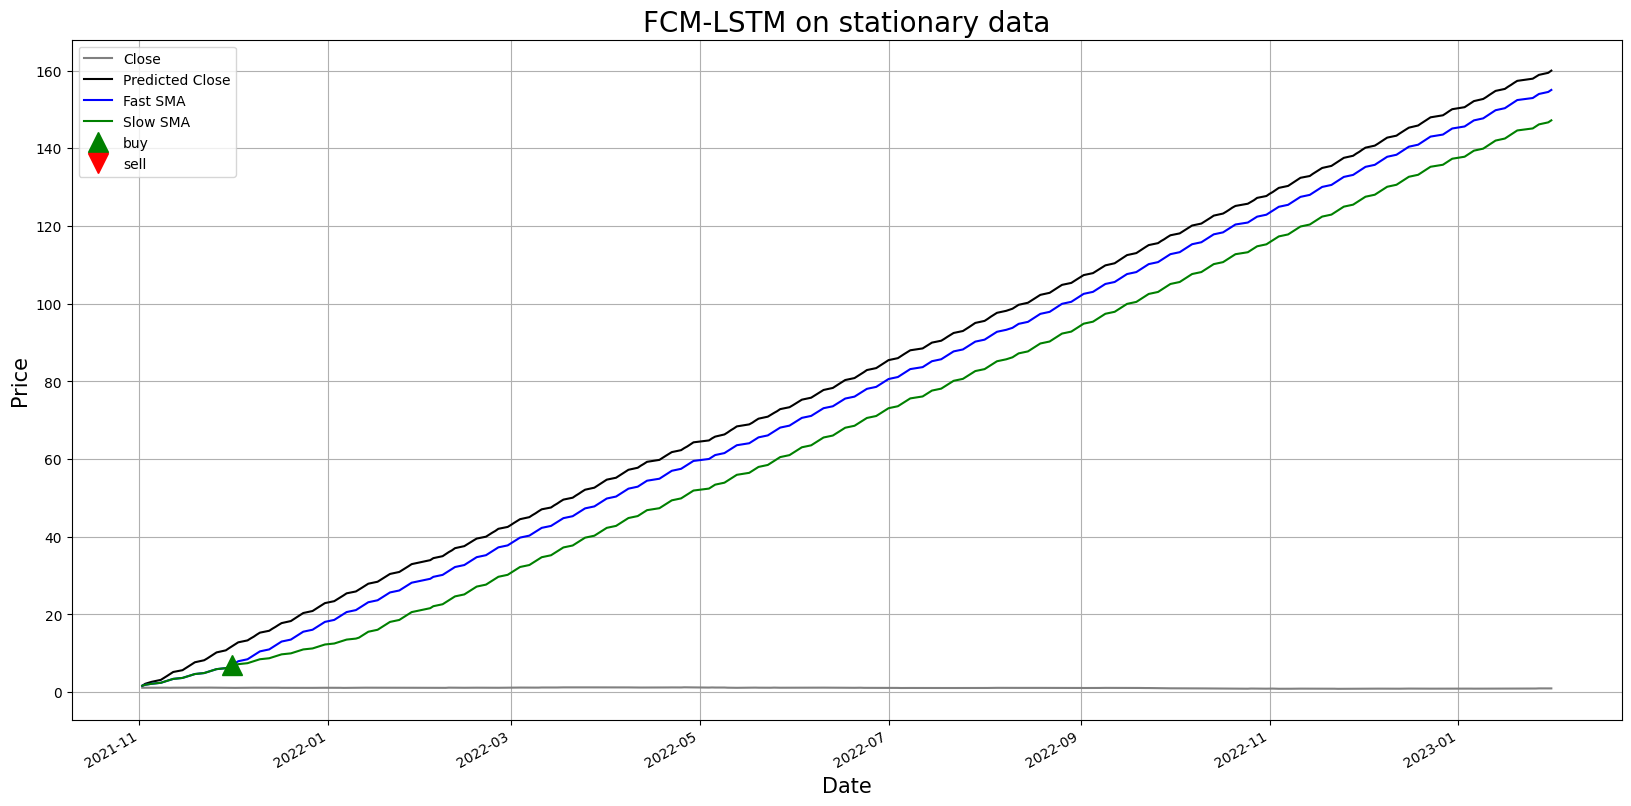

In [25]:
# Use FCM to create the fuzzified data where the number of clusters is the number of clusters with the minimum RMSE for the validation dataset
cntr, u_test, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
      test_df["Close"].values.reshape(1, -1), min_rmse_ncluster, m=7, error=0.0001, maxiter=1000, init=None)
 # Extract the fuzzified data and add the Closing Stationary price to create the input for the LSTM
# The fuzzified_data contains the fuzzified data, where each data point is represented as a set of membership degrees across clusters.
fuzzified_test_data = np.column_stack((test_df["Close_stat"].values, u_test.T))
# Normalize the fuzzified data to have values between 0 and 1 for each data point
fuzzified_test_data = scaler.fit_transform(fuzzified_test_data)
# Creating the sequences to input to the trained LSTM model
X_test_fcm, y_test_fcm = create_sequences(pd.DataFrame(fuzzified_test_data), seq_length)
# Getting the test data predictions
predicted_fuzzy_LSTM = final_stat_model.predict(X_test_fcm)
# Converting the predictions in to the original price scale
predicted_fuzzy_LSTM = undo_stat(predicted_fuzzy_LSTM, test_df["Close"][seq_length-1])
# Calculating the MSE and RMSE
test_fuzzy_loss = mean_squared_error(test_df["Close"][seq_length:], predicted_fuzzy_LSTM)
test_fuzzy_rmse = np.sqrt(test_fuzzy_loss)
print("Number of Clusters: ", min_rmse_ncluster)
print("Test MSE: %.6f" % test_fuzzy_loss)
print("Test RMSE: %.6f" % test_fuzzy_rmse )
# Saving the predictions
fcm_lstm_stat_df = pd.DataFrame()
fcm_lstm_stat_df["Close"] = test_df["Close"][seq_length:]
fcm_lstm_stat_df["Close_pred"] = predicted_fuzzy_LSTM
fcm_lstm_stat_df = compute_tradeSignal_portfolioReturn(fcm_lstm_stat_df, title = "FCM-LSTM on stationary data", pred_col = "Close_pred")


## Return Comparison Plot

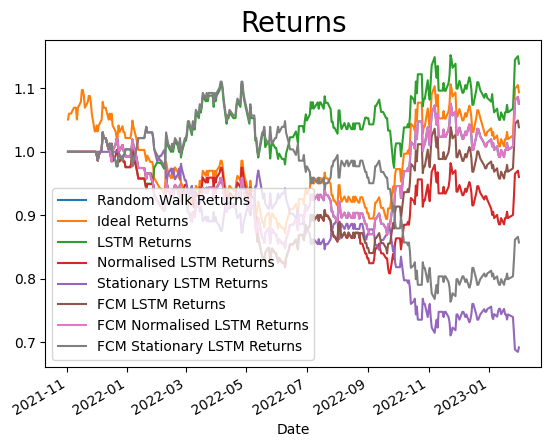

In [26]:
rw_df['Returns'].plot(label= 'Random Walk Returns')
ideal_df['Returns'].plot(label= 'Ideal Returns')
lstm_df['Returns'].plot(label = 'LSTM Returns')
lstm_norm_df['Returns'].plot(label = 'Normalised LSTM Returns')
lstm_stat_df['Returns'].plot(label = 'Stationary LSTM Returns')
fcm_lstm_df['Returns'].plot(label = 'FCM LSTM Returns')
fcm_lstm_nor_df['Returns'].plot(label = 'FCM Normalised LSTM Returns')
fcm_lstm_stat_df['Returns'].plot(label = 'FCM Stationary LSTM Returns')

plt.title("Returns", fontsize = 20)
plt.legend()
#saving the image
plt.savefig("return_comparison.png")
plt.show()

Getting the Final Returns for all the models

In [29]:
print("Random Walk ",rw_df['Returns'][-1])
print("Ideal Case ",ideal_df['Returns'][-1])
print("LSTM ",lstm_df['Returns'][-1])
print("Normal LSTM ",lstm_norm_df['Returns'][-1])
print("Stationary LSTM ",lstm_stat_df['Returns'][-1])
print("FCM-LSTM ",fcm_lstm_df['Returns'][-1])
print("Normal FCM-LSTM ",fcm_lstm_nor_df['Returns'][-1])
print("Stationary FCM-LSTM ",fcm_lstm_stat_df['Returns'][-1])


Random Walk  1.0754062442239325
Ideal Case  1.0936965475125542
LSTM  1.1387989066484216
Normal LSTM  0.9604121050697317
Stationary LSTM  0.6921422548748297
FCM-LSTM  1.0386402524946245
Normal FCM-LSTM  1.0754062442239325
Stationary FCM-LSTM  0.8572990801938989


<Figure size 640x480 with 0 Axes>

# References
1. https://medium.com/@avinashkella/understanding-fuzzy-c-means-clustering-with-python-implementation-a-beginners-guide-3dbdf180393b
2. https://github.com/scikit-fuzzy/scikit-fuzzy
3. https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm